## Import libraries

In [2]:
# Base libraries
import pandas as pd
import numpy as np
from pyforest import *

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")


import pickle
# import yaml


## Exploring the database

In [3]:
# Open the excel database 
# In Row the 184 countries and the years
economy = pd.read_excel('C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Data/Data_economy_Source.xlsx')
pd.set_option('display.max_columns', None)
economy.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Country Name Country Code  Years  Access to electricity (% of population)  \
0  Afghanistan          AFG   2004                                17.236319   
1  Afghanistan          AFG   2005                                23.000000   
2  Afghanistan          AFG   2006                                28.228613   
3  Afghanistan          AFG   2007                                33.748680   
4  Afghanistan          AFG   2008                                42.400000   

   Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0                                           134.8182               
1                                           129.0108               
2                                           123.2034               
3                                           117.3960               
4                                           111.1414               

   Age dependency ratio (% of working-age population)  \
0                                         100.159030    
1                                          99.011831    
2                                          99.632029    
3                                         100.231023    
4                                         100.656496    

   Agriculture, value added (% of GDP)  \
0                            29.391196   
1                            30.787967   
2                            28.289738   
3                            29.798966   
4                            24.693823   

   Agriculture, value added (annual % growth)  \
0                                  -22.237497   
1                                   17.699556   
2                                   -5.108280   
3                                   14.694763   
4                                  -14.916718   

   Agriculture, value added (constant 2005 US$)  \
0                                  2.817259e+09   
1                                  3.315901e+09   
2                                  3.146516e+09   
3                                  3.608889e+09   
4                                  3.070561e+09   

   Air transport, registered carrier departures worldwide  \
0                                       22627.285714        
1                                       22627.285714        
2                                       22627.285714        
3                                       22627.285714        
4                                       22627.285714        

   Automated teller machines (ATMs) (per 100,000 adults)  \
0                                           0.015900       
1                                           0.060852       
2                                           0.118134       
3                                           0.208818       
4                                           0.302450       

   Borrowers from commercial banks (per 1,000 adults)  \
0                                           3.530434    
1                                           3.530434    
2                                           3.530434    
3                                           3.530434    
4                                           3.379768    

   Consumer price index (2010 = 100)  \
0                          63.131893   
1                          71.140974   
2                          76.302178   
3                          82.774807   
4                         108.066600   

   Contributing family workers, female (% of female employment) (modeled ILO estimate)  \
0                                          67.136002                                     
1                                          66.083000                                     
2                                          65.818001                                     
3                                          64.084999                                     
4                                          64.242996                                     

   Contributing family workers, male (% of male employment) (modele

In [4]:
economy.shape


(2847, 373)

## Check, replace and drop clolumns with many missing values

In [5]:
economy = economy.apply(lambda x : x.replace("..", np.nan))
economy.tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Country Name Country Code  Years  \
2842     Zimbabwe          ZWE   2012   
2843     Zimbabwe          ZWE   2013   
2844     Zimbabwe          ZWE   2014   
2845     Zimbabwe          ZWE   2015   
2846     Zimbabwe          ZWE   2016   

      Access to electricity (% of population)  \
2842                                36.728878   
2843                                37.076813   
2844                                32.300000   
2845                                33.700000   
2846                                38.145138   

      Adolescent fertility rate (births per 1,000 women ages 15-19)  \
2842                                           112.7670               
2843                                           111.0298               
2844                                           109.2926               
2845                                           107.5554               
2846                                           105.8182               

      Age dependency ratio (% of working-age population)  \
2842                                          80.035271    
2843                                          79.876624    
2844                                          79.717509    
2845                                          79.514364    
2846                                          79.195304    

      Agriculture, value added (% of GDP)  \
2842                             9.666899   
2843                             8.827171   
2844                            10.728949   
2845                            10.143072   
2846                             9.735282   

      Agriculture, value added (annual % growth)  \
2842                                    7.836032   
2843                                   -2.570668   
2844                                   22.999654   
2845                                   -5.205851   
2846                                   -3.615329   

      Agriculture, value added (constant 2005 US$)  \
2842                                  1.265402e+09   
2843                                  1.232873e+09   
2844                                  1.516429e+09   
2845                                  1.437486e+09   
2846                                  1.385516e+09   

      Air transport, registered carrier departures worldwide  \
2842                                       11560.367854        
2843                                       27684.000000        
2844                                        3730.000000        
2845                                        4145.000000        
2846                                        4231.000000        

      Automated teller machines (ATMs) (per 100,000 adults)  \
2842                                           4.345909       
2843                                           4.247220       
2844                                           5.235629       
2845                                           6.150878       
2846                                           6.010074       

      Borrowers from commercial banks (per 1,000 adults)  \
2842                                          50.676440    
2843                                          51.697985    
2844                                          37.347559    
2845                                          34.298184    
2846                                         218.826912    

      Consumer price index (2010 = 100)  \
2842                         107.328296   
2843                         109.079488   
2844                         108.847215   
2845                         106.224541   
2846                         104.560626   

      Contributing family workers, female (% of female employment) (modeled ILO estimate)  \
2842                                             11.244                                     
2843                                             11.688                                     
2844                                             10.085                                     
2845      

In [6]:
nulls_percent_df = pd.DataFrame(economy.isna().sum()/len(economy)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

<IPython.core.display.Javascript object>

column_name  nulls_percentage
0                                         Country Name          0.000000
1                                         Country Code          0.000000
2                                                Years          0.000000
3              Access to electricity (% of population)          0.000000
4    Adolescent fertility rate (births per 1,000 wo...          0.000000
..                                                 ...               ...
368  Trading across borders: Time to export: Border...          0.182648
369  Trading across borders: Time to export: Docume...          0.182648
370  Trading across borders: Time to import (days) ...          0.187215
371  Trading across borders: Time to import: Border...          0.182648
372  Trading across borders: Time to import: Docume...          0.182648

[373 rows x 2 columns]

In [7]:
def threshold(df, threshold ):
    nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>threshold]
    return list(columns_above_threshold['column_name'])
# Test your function here
threshold(economy, 0.5)

<IPython.core.display.Javascript object>

['CPIA economic management cluster average (1=low to 6=high)',
 'CPIA financial sector rating (1=low to 6=high)',
 'CPIA gender equality rating (1=low to 6=high)',
 'CPIA macroeconomic management rating (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA property rights and rule-based governance rating (1=low to 6=high)',
 'CPIA social protection rating (1=low to 6=high)',
 'Market capitalization of listed companies (% of GDP)',
 'Ease of doing business score (DB15 methodology)',
 'Enforcing contracts (DB16 methodology) - Score',
 'Enforcing contracts: Court structure and proceedings (0-5) (DB16 methodology)',
 'Enforcing contracts: Quality of judicial administration index (0-18) (DB17-19 methodology)',
 'Enforcing contracts: Quality of judicial processes index (0-19) (DB17-19 methodology) - Score',
 'Paying taxes: Time to comply with VAT refund (hours) (DB17-20 methodology)',
 'Paying taxes: Time to obtain VAT refund (weeks) (DB17

## Drop the unrelevant columns with many missing values

In [8]:
economy = economy.drop(['CPIA economic management cluster average (1=low to 6=high)',
 'CPIA financial sector rating (1=low to 6=high)',
 'CPIA gender equality rating (1=low to 6=high)',
 'CPIA macroeconomic management rating (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA property rights and rule-based governance rating (1=low to 6=high)',
 'CPIA social protection rating (1=low to 6=high)',
 'Market capitalization of listed companies (% of GDP)',
 'Ease of doing business score (DB15 methodology)',
 'Enforcing contracts (DB16 methodology) - Score',
 'Enforcing contracts: Court structure and proceedings (0-5) (DB16 methodology)',
 'Enforcing contracts: Quality of judicial administration index (0-18) (DB17-19 methodology)',
 'Enforcing contracts: Quality of judicial processes index (0-19) (DB17-19 methodology) - Score',
 'Paying taxes: Time to comply with VAT refund (hours) (DB17-20 methodology)',
 'Paying taxes: Time to obtain VAT refund (weeks) (DB17-20 methodology)',
 'Protecting minority investors: Extent of conflict of interest regulation index (0-10) (DB15-19 methodology)',
 'Protecting minority investors: Extent of shareholder governance index (0-10) (DB15-19 methodology)',
 'Rank: Dealing with construction permits (1=most business-friendly regulations)',
 'Rank: Ease of doing business index (1=most business-friendly regulations)',
 'Rank: Enforcing contracts (1=most business-friendly regulations)',
 'Rank: Getting credit (1=most business-friendly regulations)',
 'Rank: Getting electricity (1=most business-friendly regulations)',
 'Rank: Paying taxes (1=most business-friendly regulations)',
 'Rank: Protecting minority investors (1=most business-friendly regulations)',
 'Rank: Registering property (1=most business-friendly regulations)',
 'Rank: Resolving insolvency (1=most business-friendly regulations)',
 'Rank: Starting a business (1=most business-friendly regulations)',
 'Rank: Trading across borders (1=most business-friendly regulations)',
 'Registering property (DB16 methodology) - Score',
 'Registering property: Quality of land administration index (0-30) (DB17-19 methodology)',
 'Registering property: Quality of land administration index with Gender (0-30) (DB17-19 methodology) - Score',
 'Resolving insolvency (DB04-14 methodology) - Score'], axis =1)

## Check & fill  the missing value per country and per columns

In [9]:
economy.shape

(2847, 341)

In [10]:
my_cols = economy[economy.columns.difference(['Country Name', 'Country Code'])]
List  = my_cols.columns.to_list()

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(my_cols)
economy2 = pd.DataFrame(X)
economy2.columns = List
economy2 = economy2.astype(int)
economy2[['Country Name', 'Country Code']]=economy[['Country Name', 'Country Code']]
economy = economy2


<IPython.core.display.Javascript object>

In [11]:
economy.shape

(2847, 341)

# Selecting columns&rows, check correlation

## Distribution plots of numerical variables

In [12]:
# Get the numerical variables from our dataset.
numerical = economy.select_dtypes(include=np.number)
numerical.head()

<IPython.core.display.Javascript object>

Access to electricity (% of population)  \
0                                       17   
1                                       23   
2                                       28   
3                                       33   
4                                       42   

   Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0                                                134               
1                                                129               
2                                                123               
3                                                117               
4                                                111               

   Age dependency ratio (% of working-age population)  \
0                                                100    
1                                                 99    
2                                                 99    
3                                                100    
4                                                100    

   Agriculture, value added (% of GDP)  \
0                                   29   
1                                   30   
2                                   28   
3                                   29   
4                                   24   

   Agriculture, value added (annual % growth)  \
0                                         -22   
1                                          17   
2                                          -5   
3                                          14   
4                                         -14   

   Agriculture, value added (constant 2005 US$)  \
0                                   -2147483648   
1                                   -2147483648   
2                                   -2147483648   
3                                   -2147483648   
4                                   -2147483648   

   Air transport, registered carrier departures worldwide  \
0                                              22627        
1                                              22627        
2                                              22627        
3                                              22627        
4                                              22627        

   Automated teller machines (ATMs) (per 100,000 adults)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Borrowers from commercial banks (per 1,000 adults)  \
0                                                  3    
1                                                  3    
2                                                  3    
3                                                  3    
4                                                  3    

   Consumer price index (2010 = 100)  \
0                                 63   
1                                 71   
2                                 76   
3                                 82   
4                                108   

   Contributing family workers, female (% of female employment) (modeled ILO estimate)  \
0                                                 67                                     
1                                                 66                                     
2                                                 65                                     
3                                                 64                                     
4                                                 64                                     

   Contributing family workers, male (% of male employment) (modeled ILO estimate)  \
0                                                 25                                 
1                                                 26                                 
2       

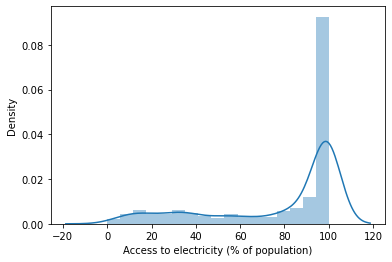

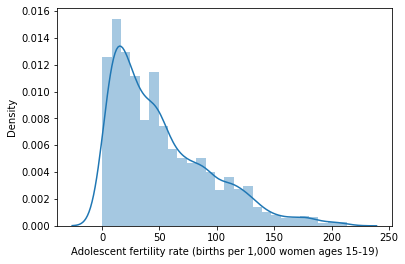

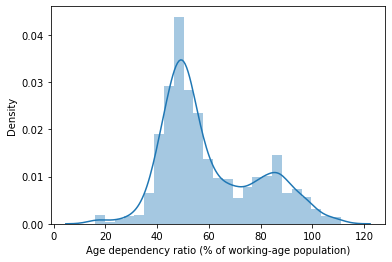

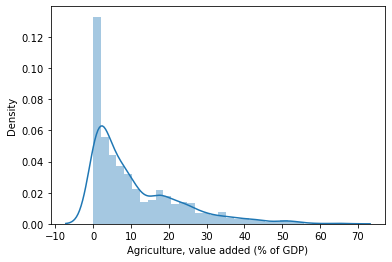

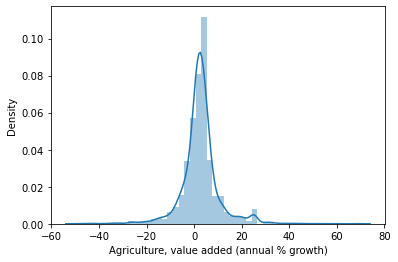

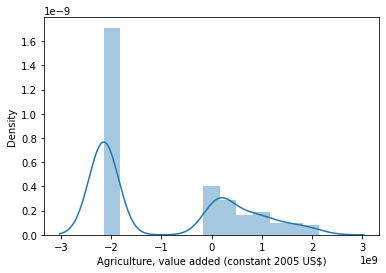

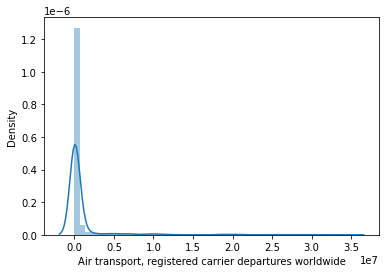

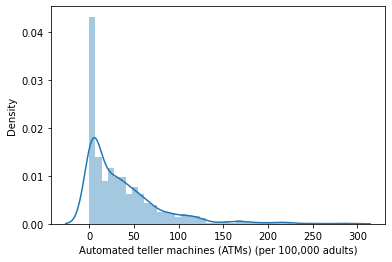

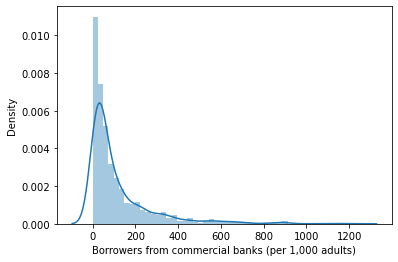

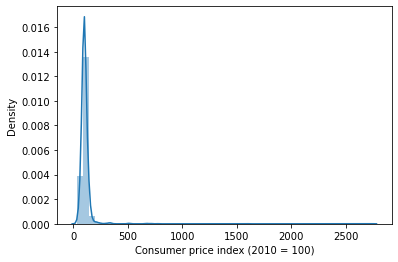

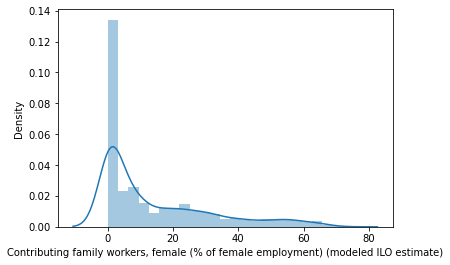

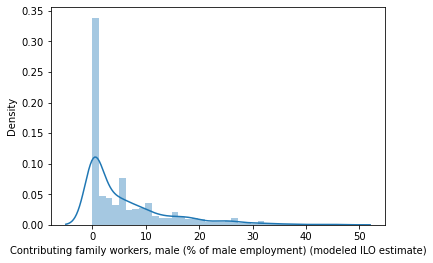

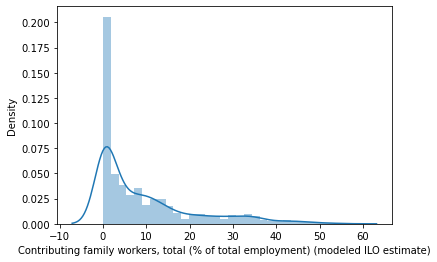

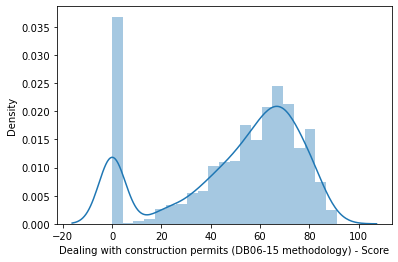

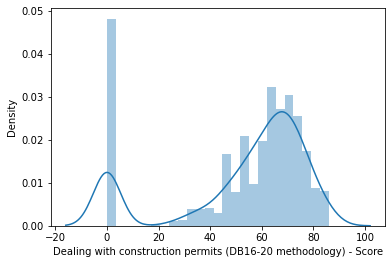

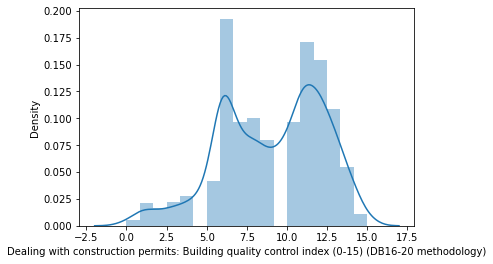

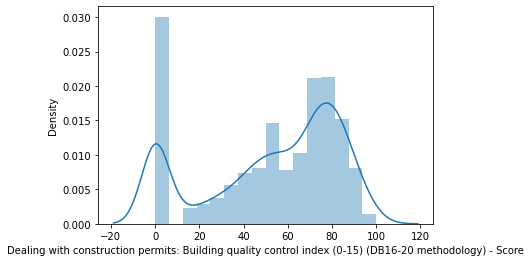

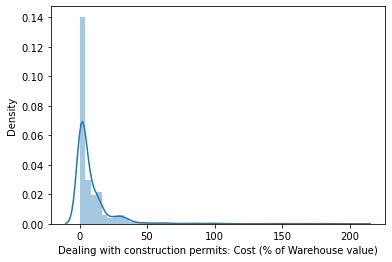

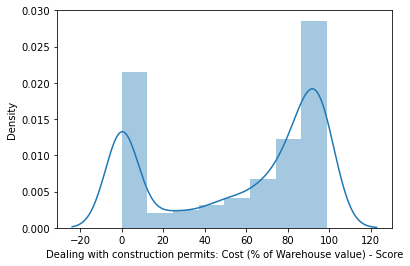

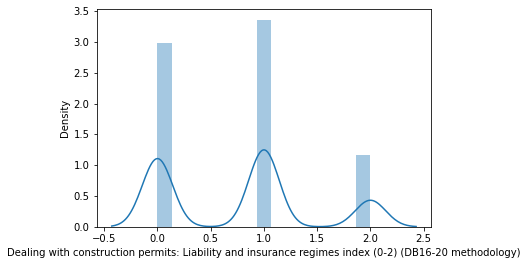

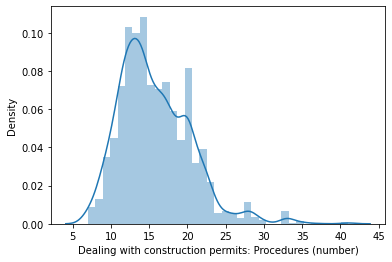

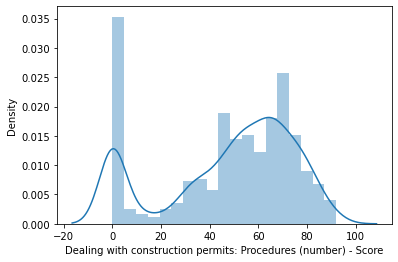

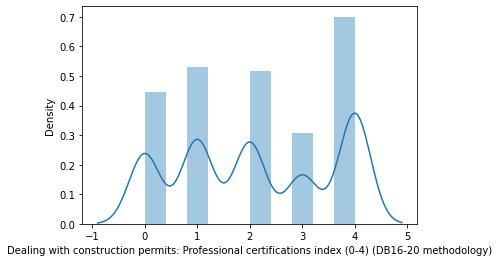

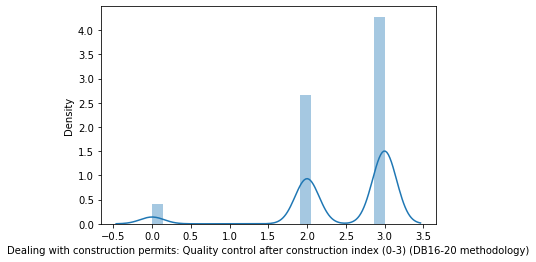

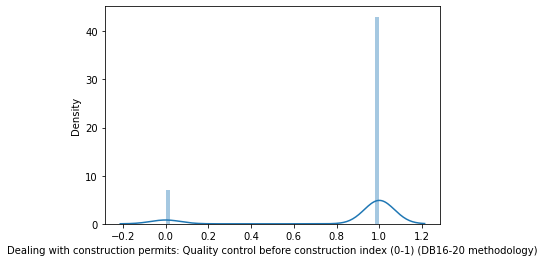

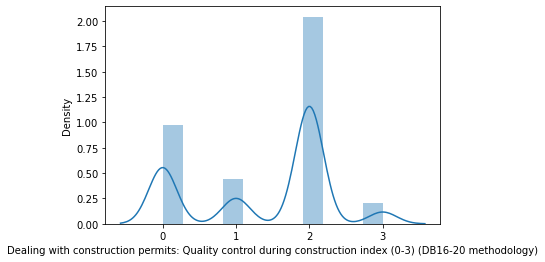

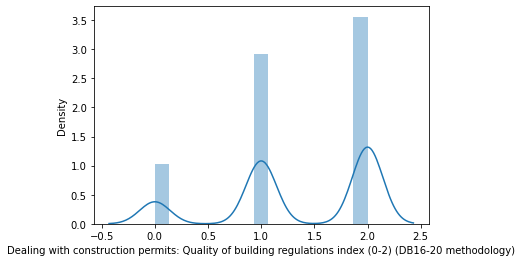

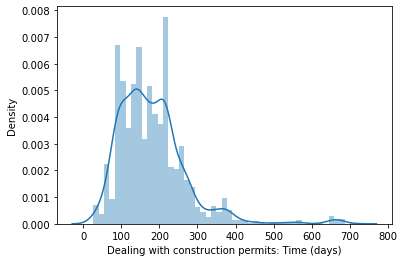

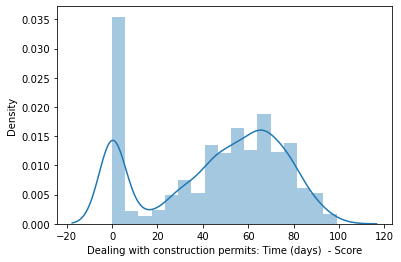

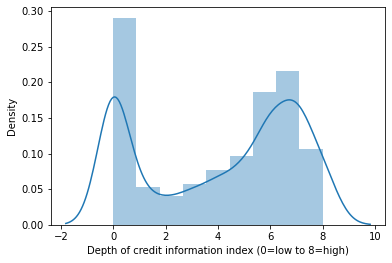

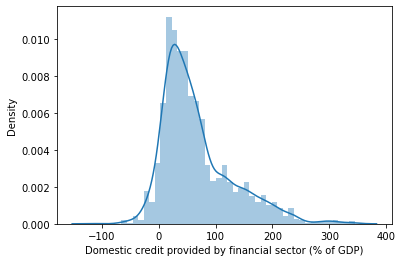

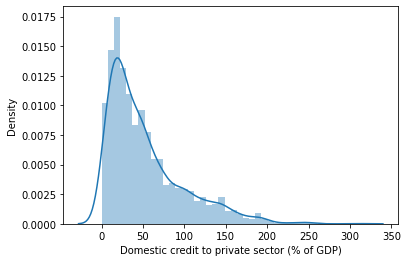

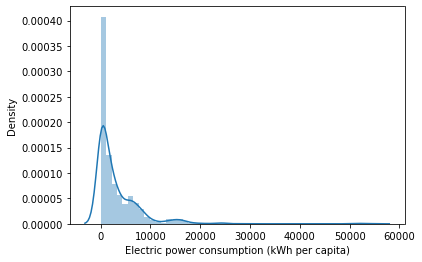

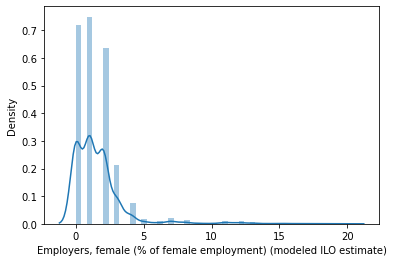

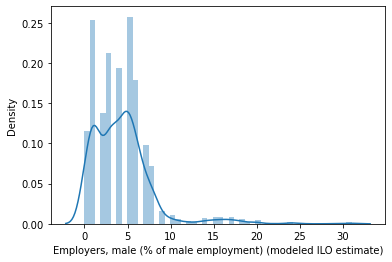

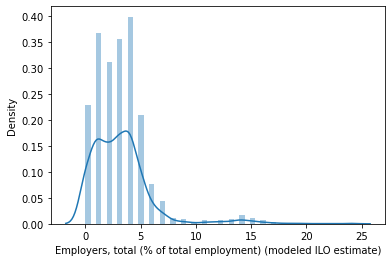

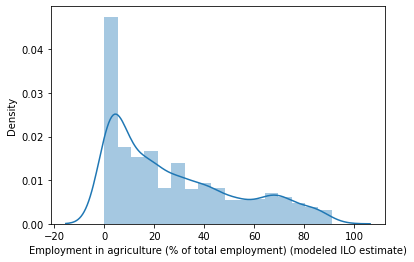

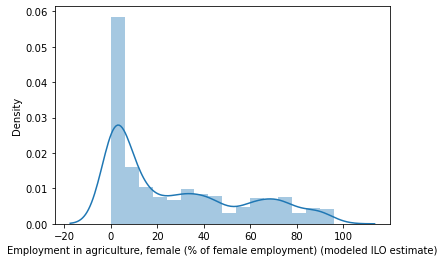

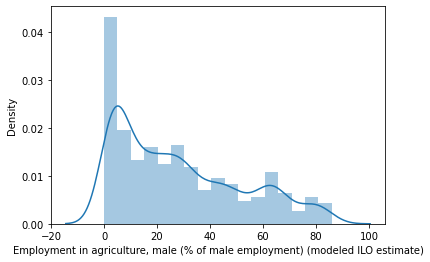

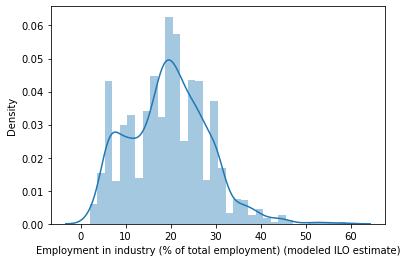

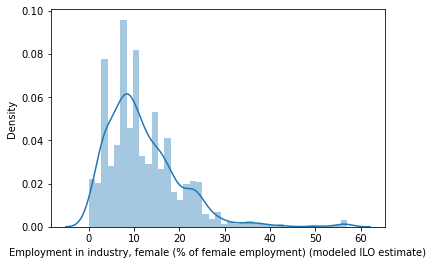

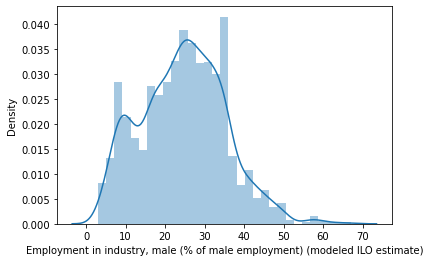

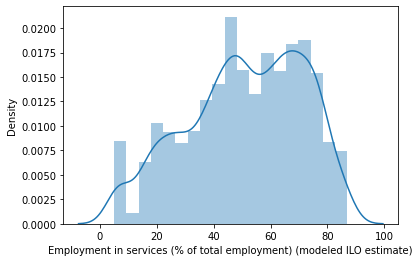

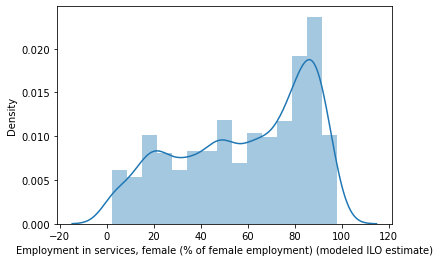

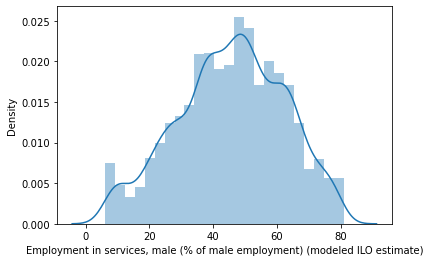

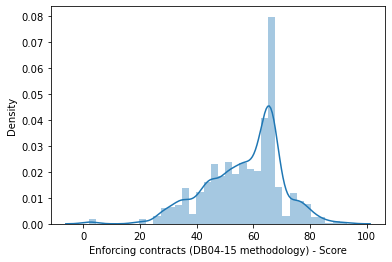

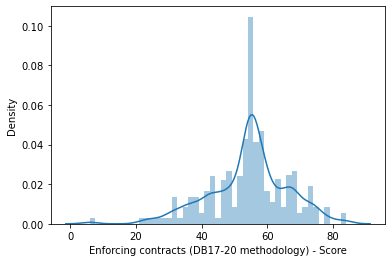

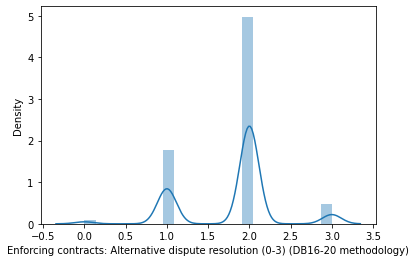

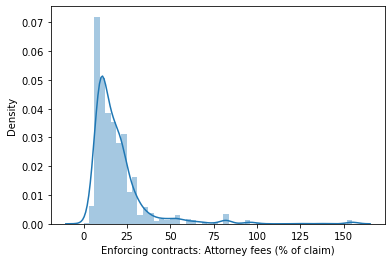

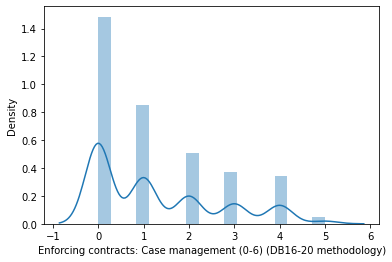

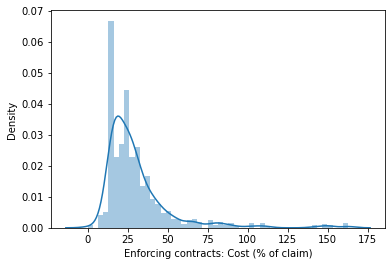

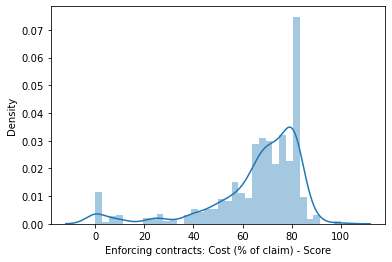

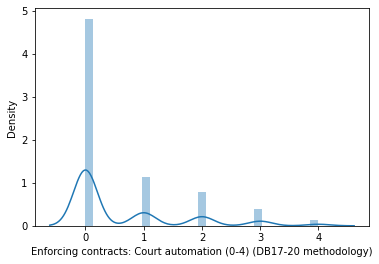

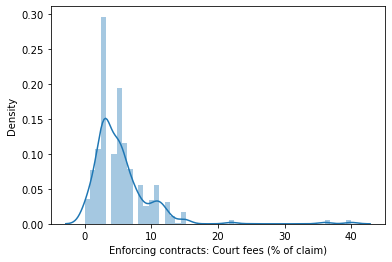

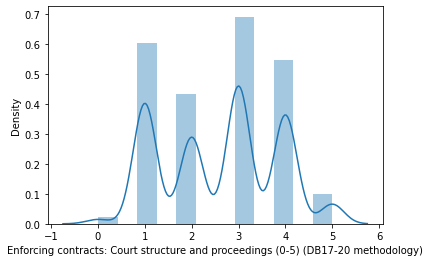

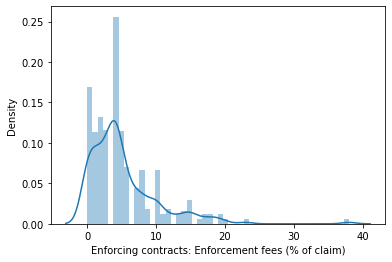

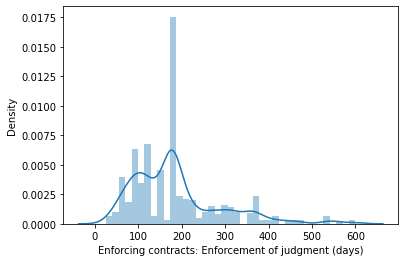

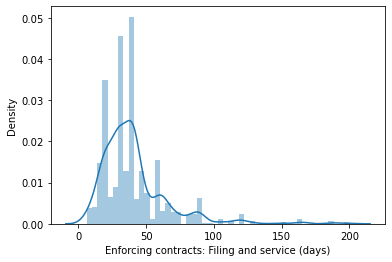

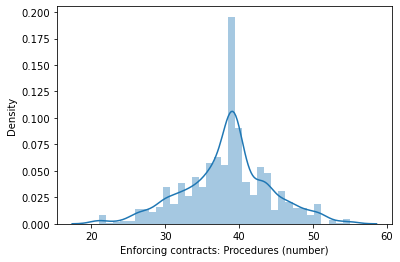

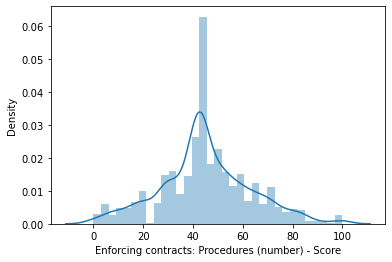

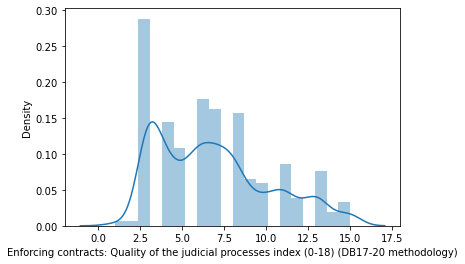

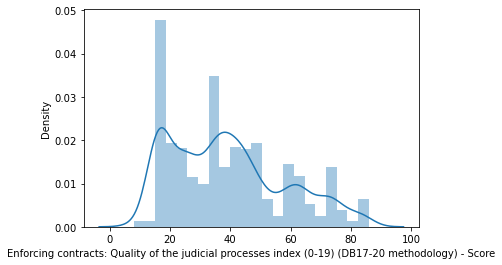

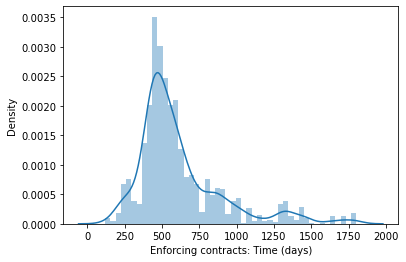

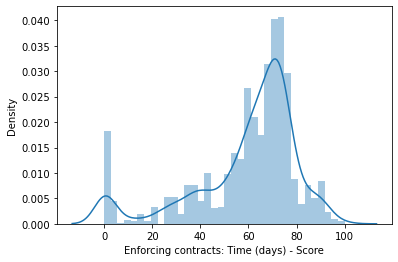

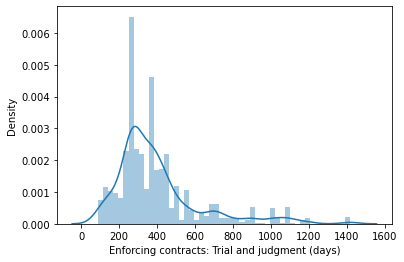

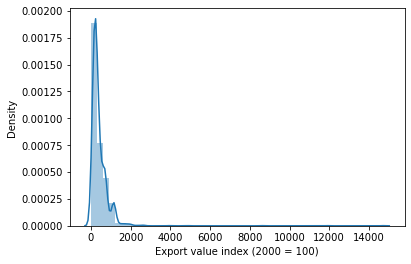

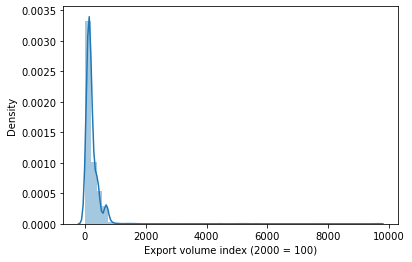

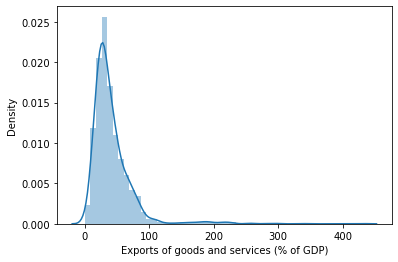

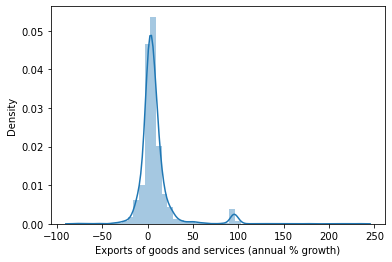

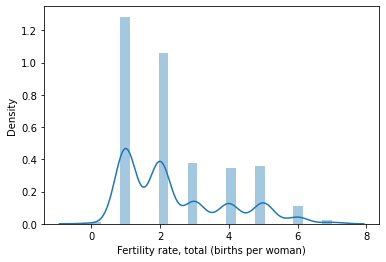

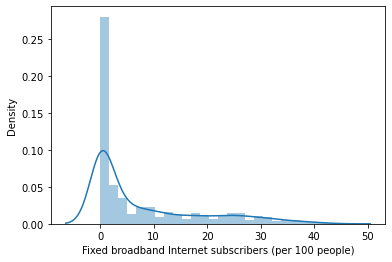

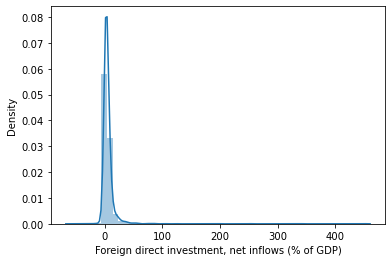

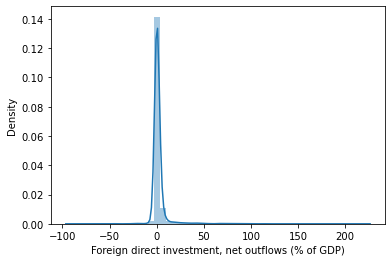

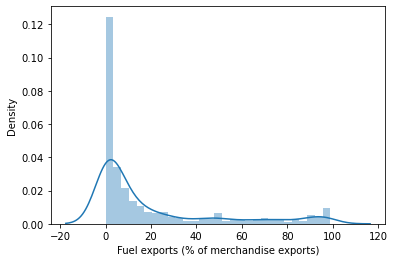

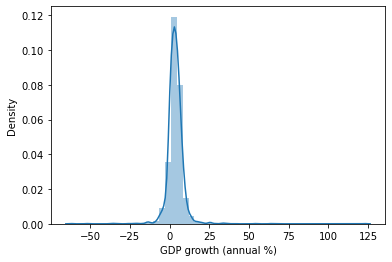

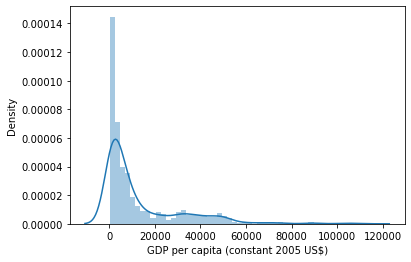

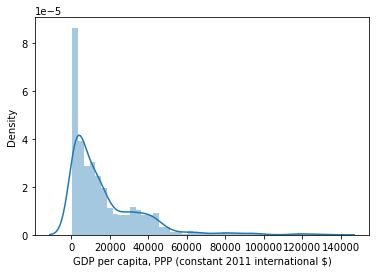

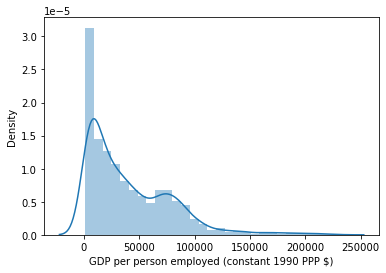

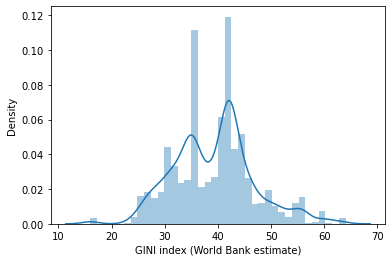

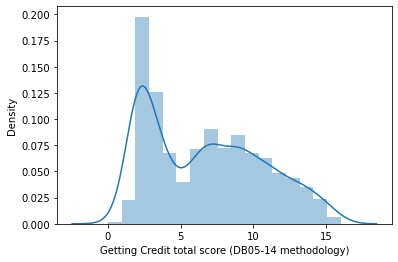

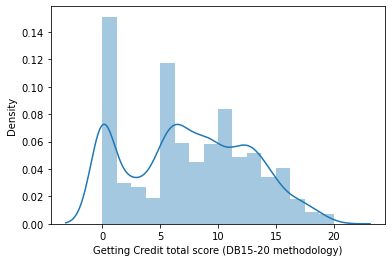

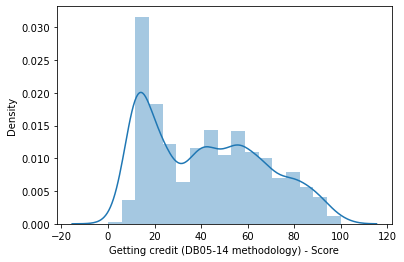

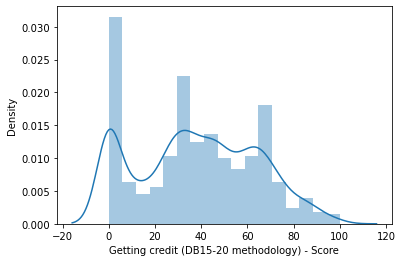

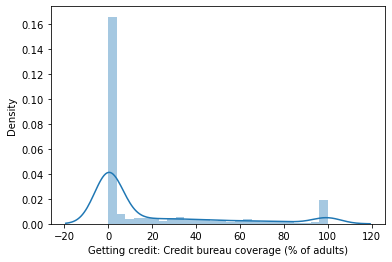

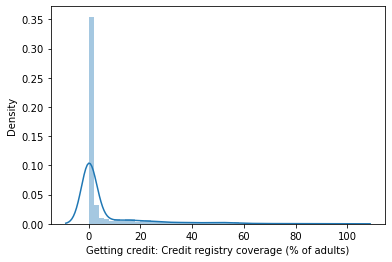

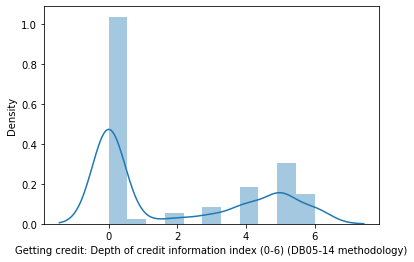

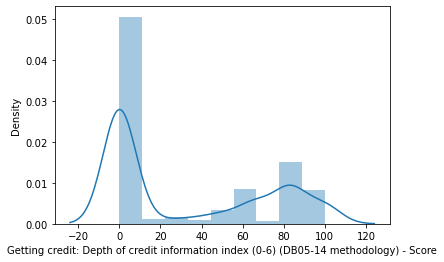

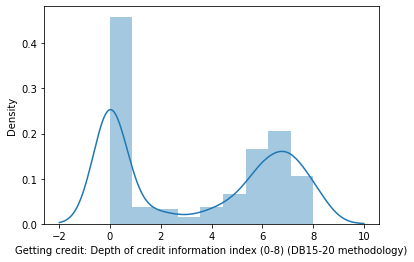

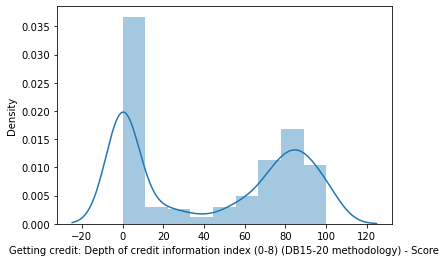

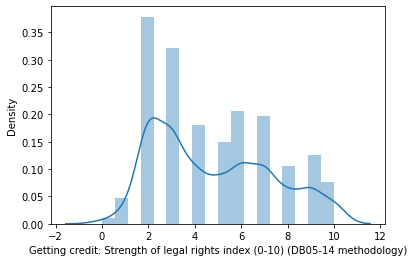

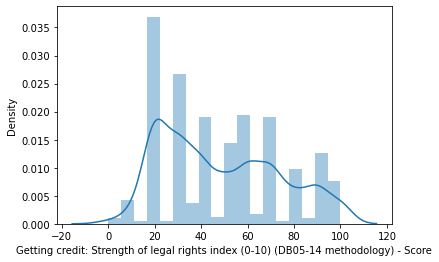

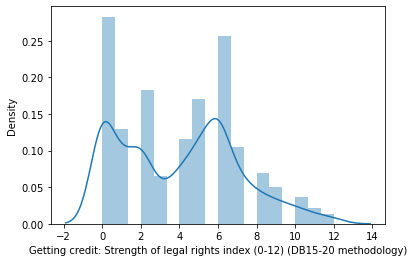

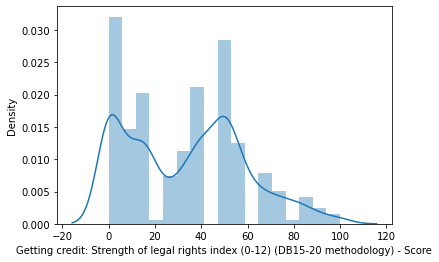

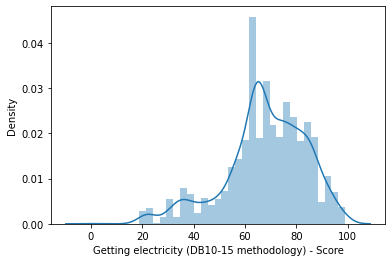

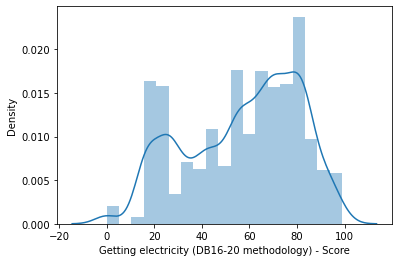

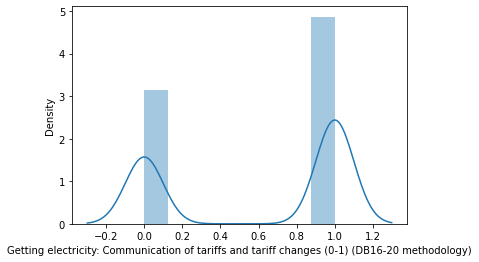

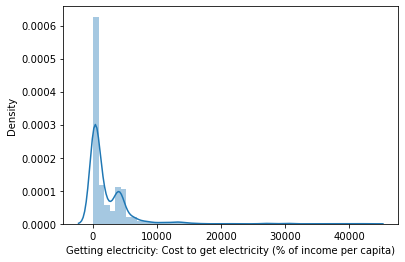

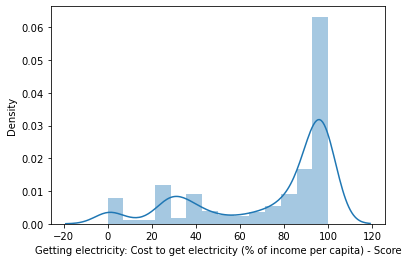

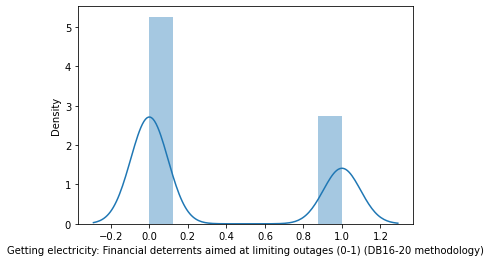

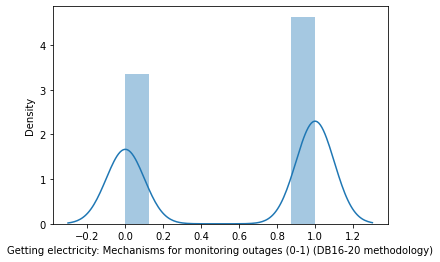

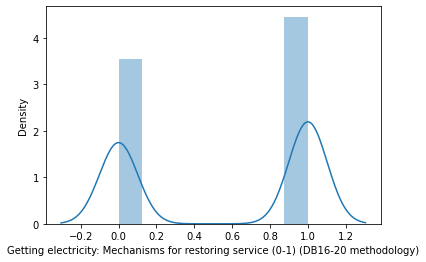

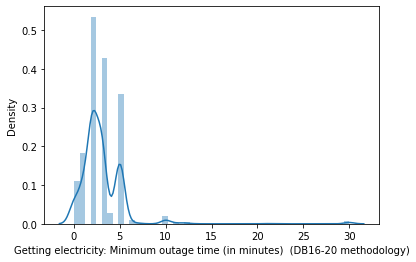

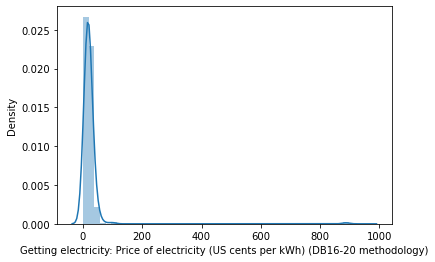

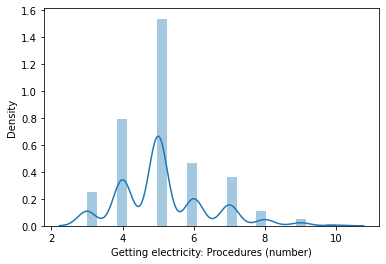

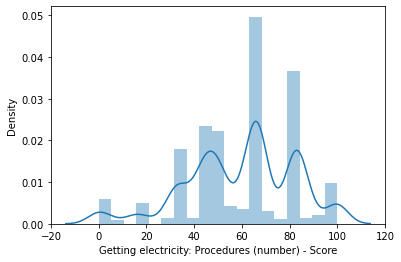

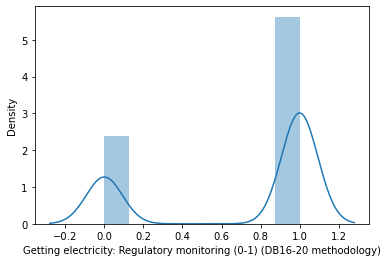

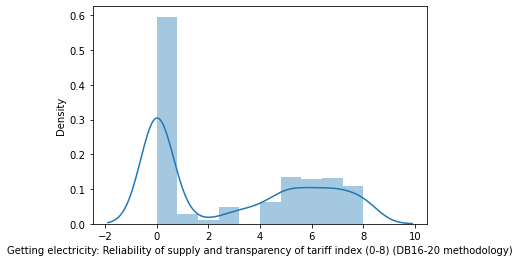

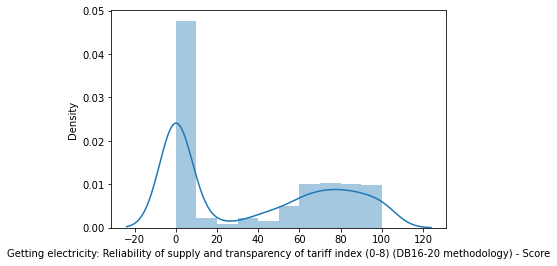

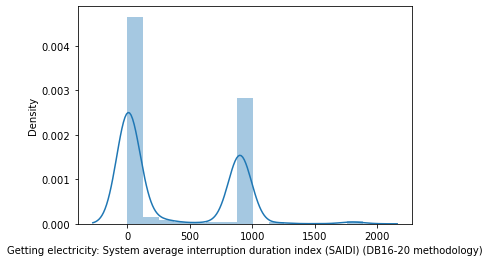

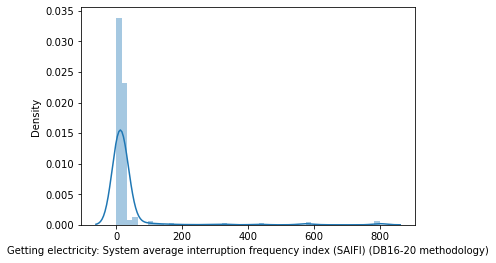

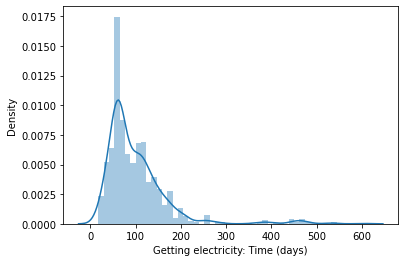

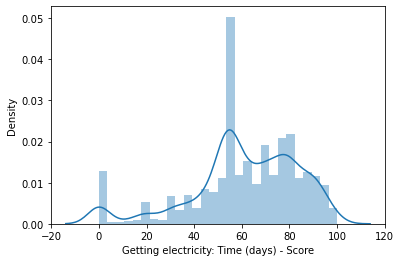

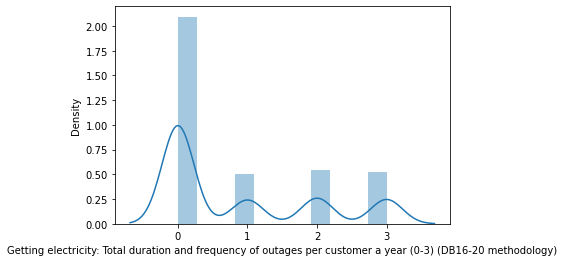

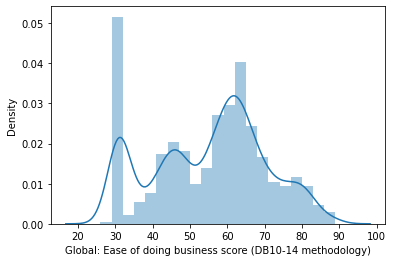

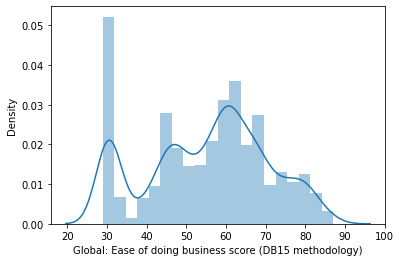

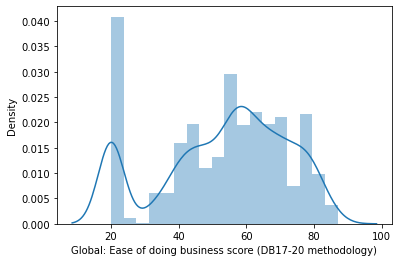

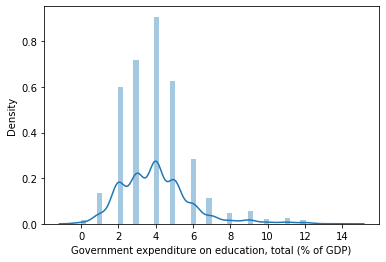

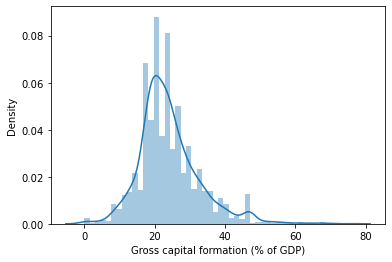

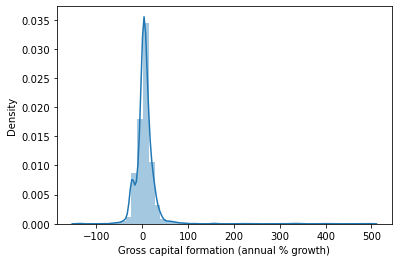

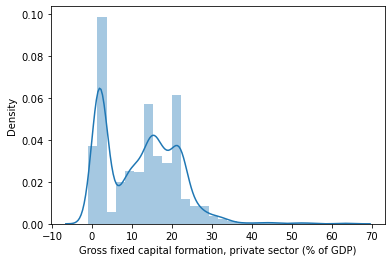

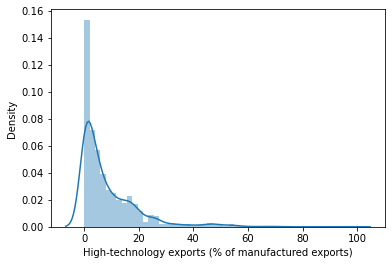

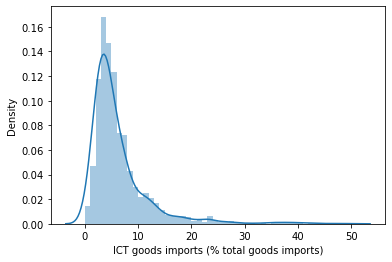

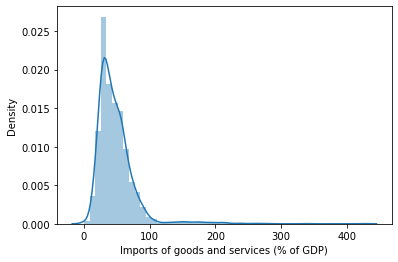

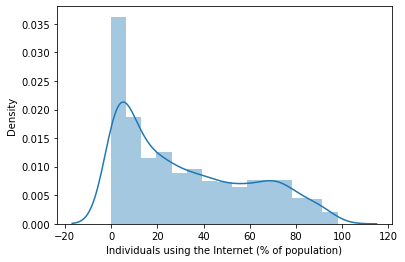

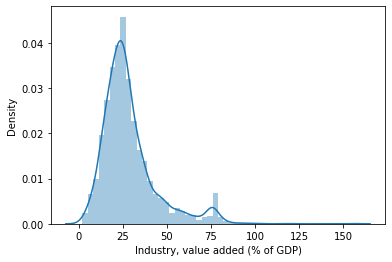

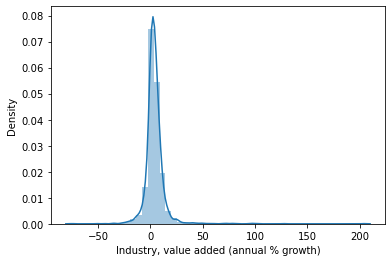

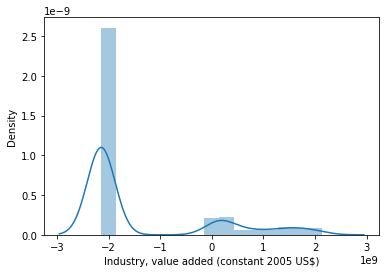

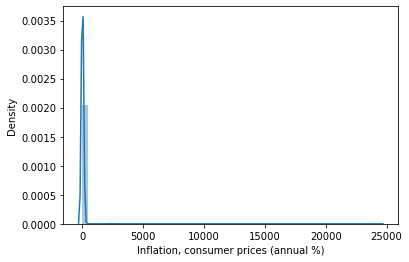

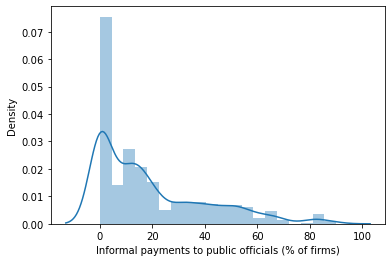

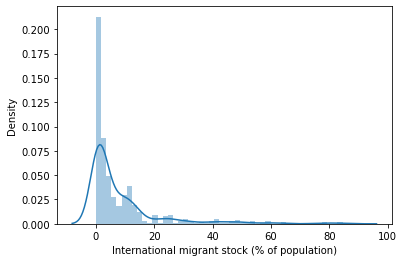

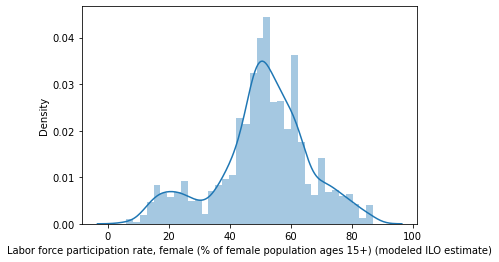

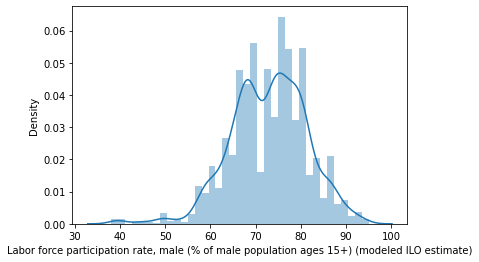

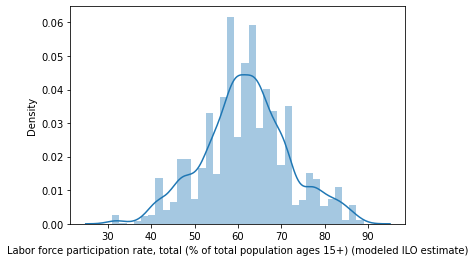

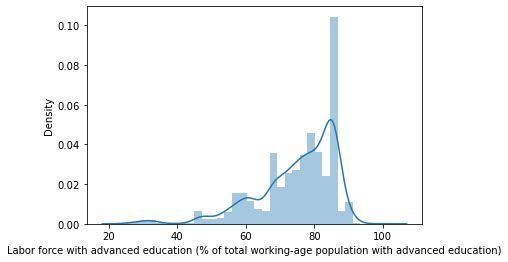

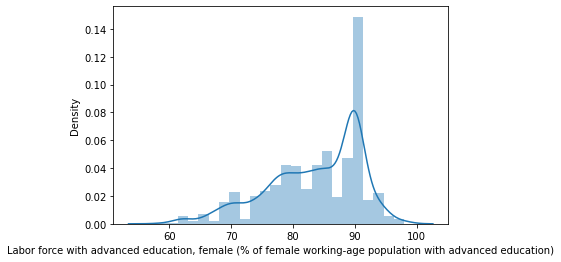

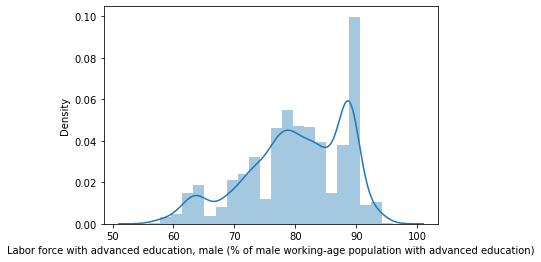

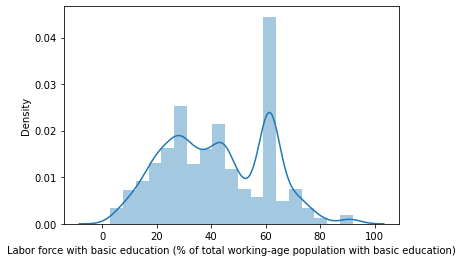

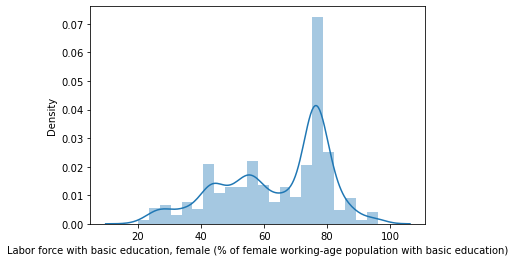

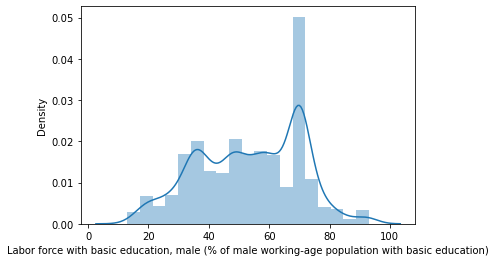

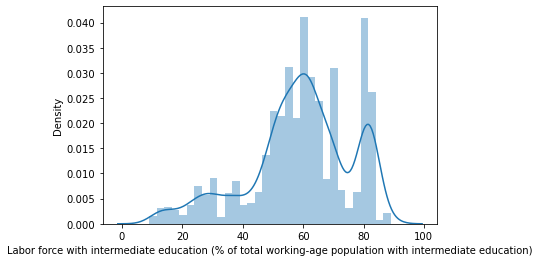

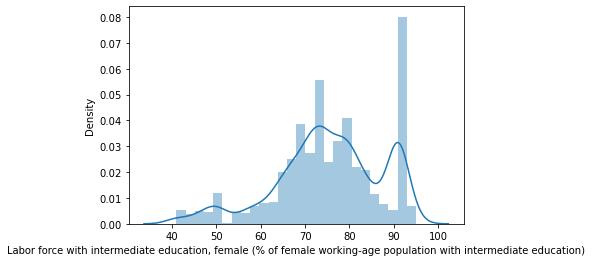

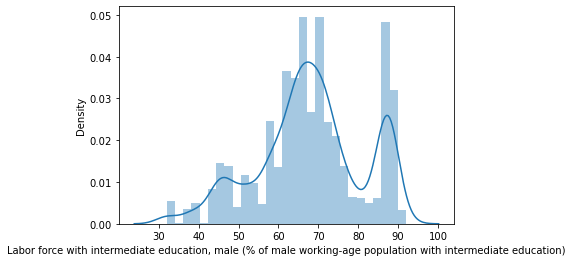

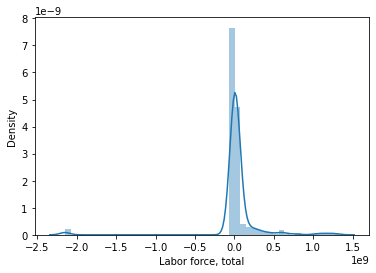

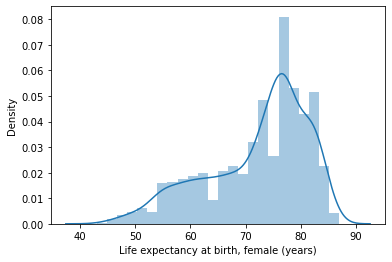

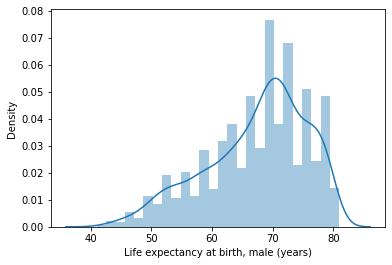

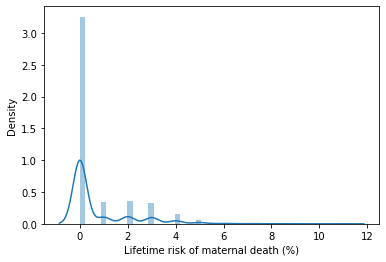

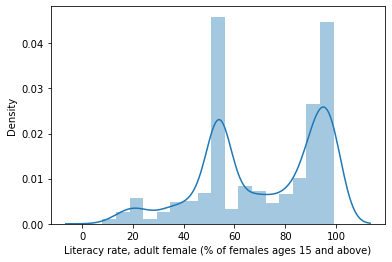

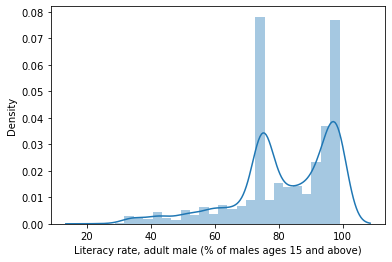

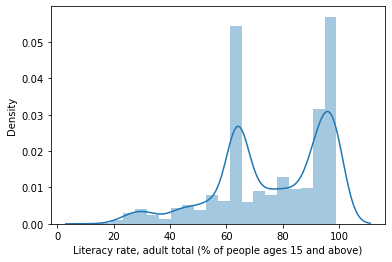

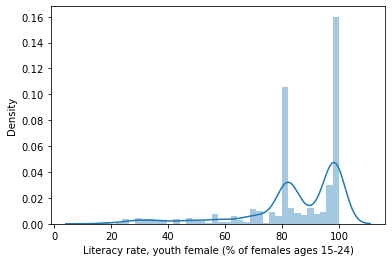

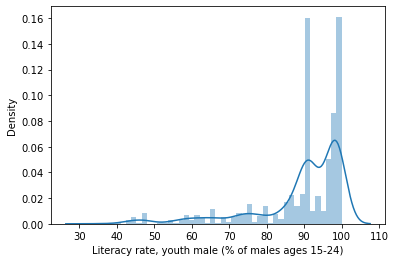

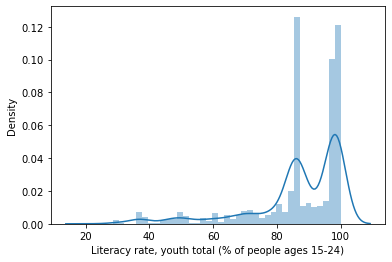

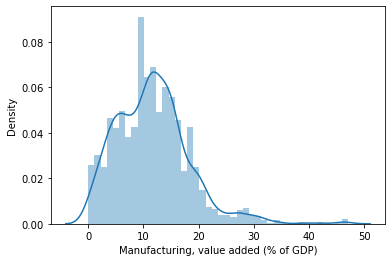

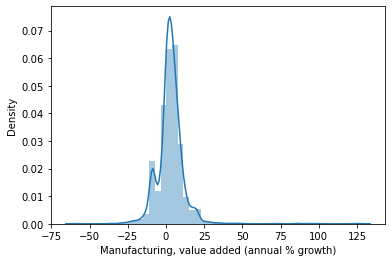

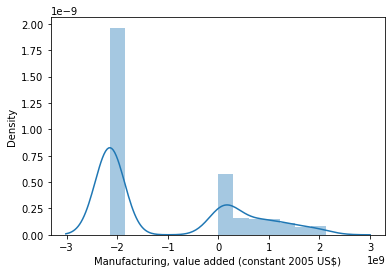

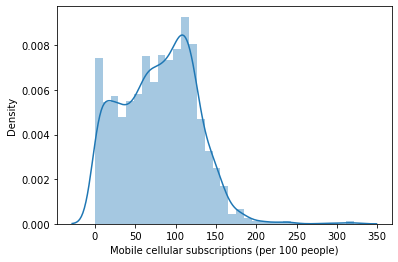

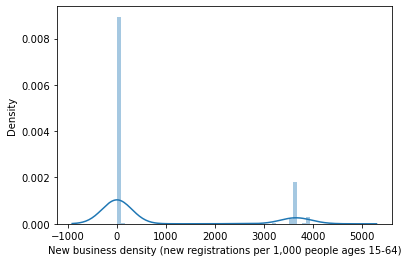

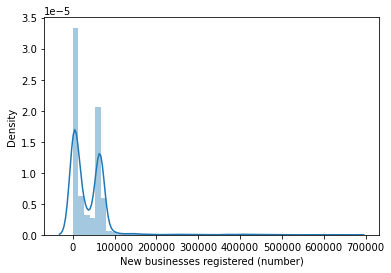

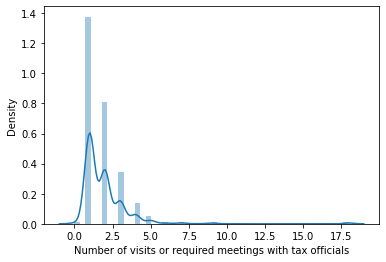

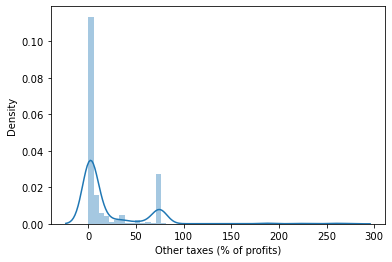

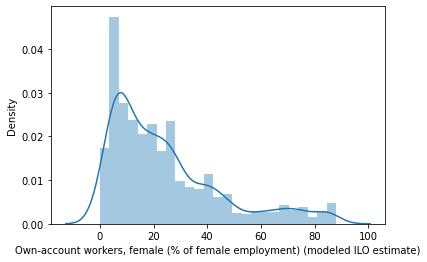

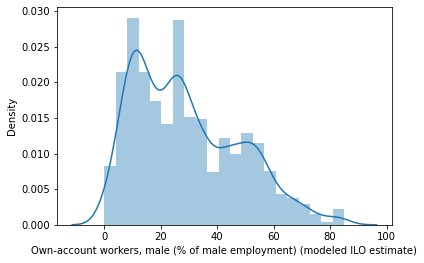

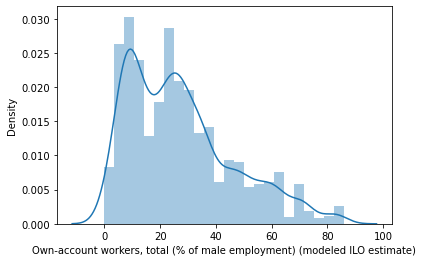

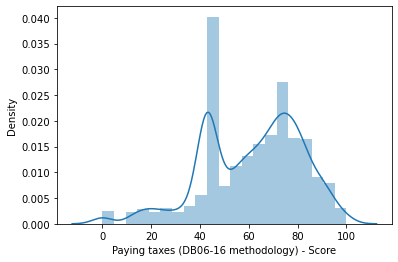

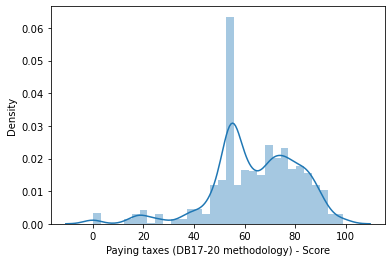

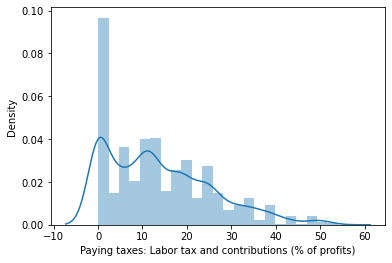

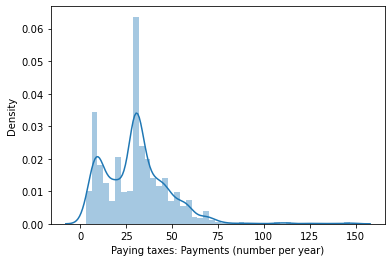

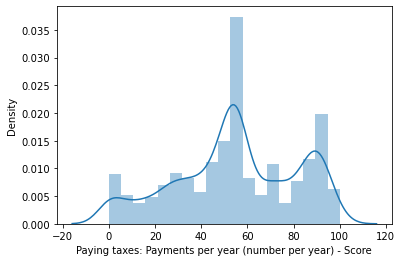

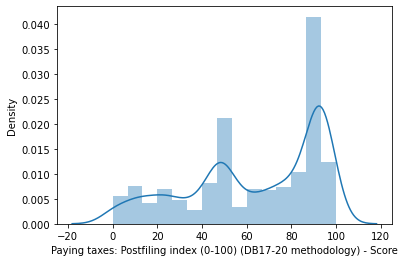

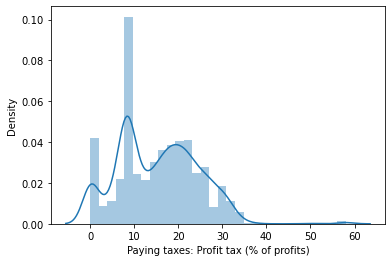

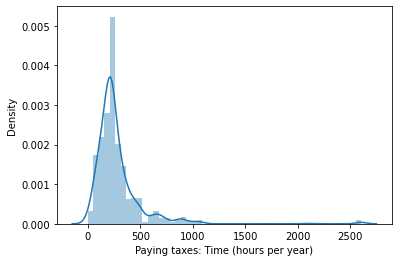

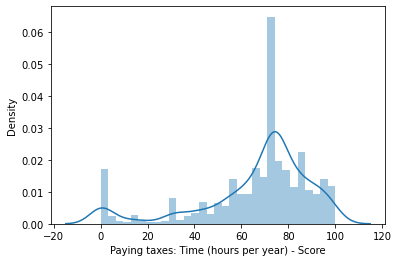

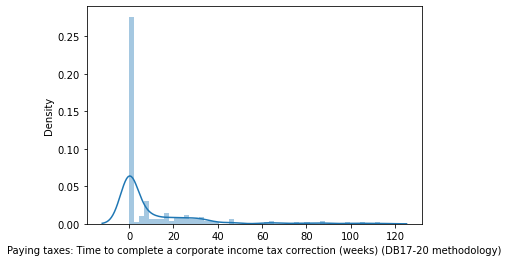

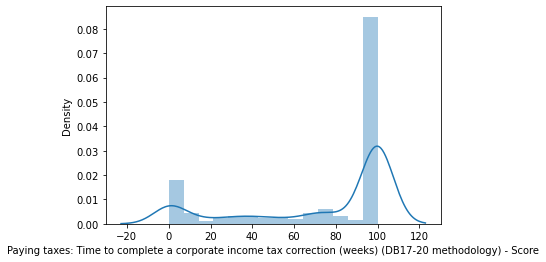

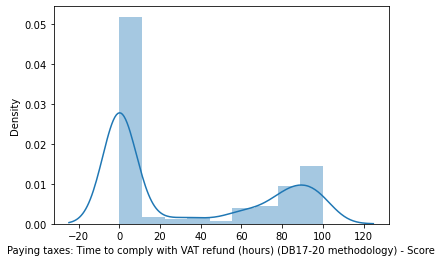

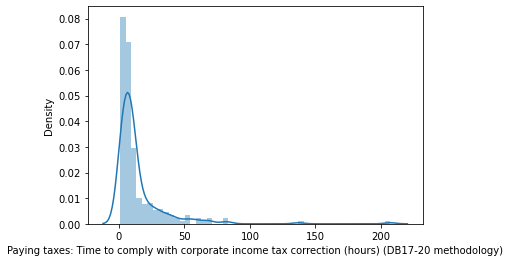

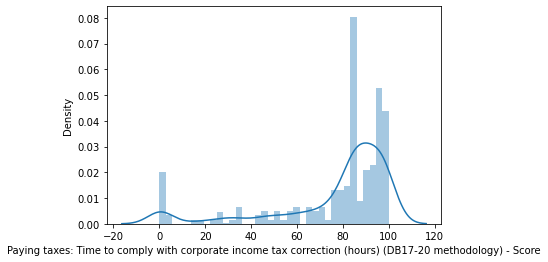

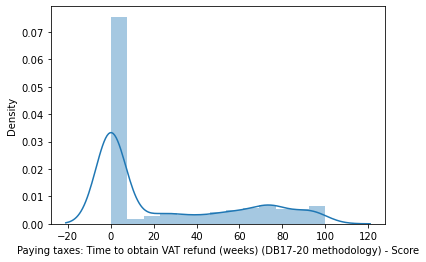

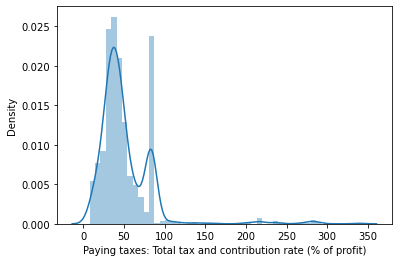

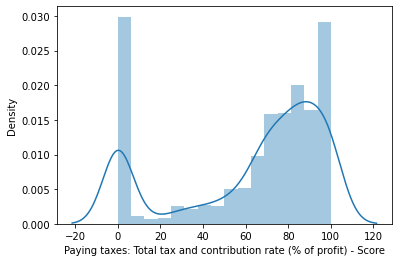

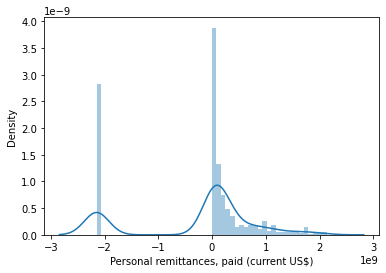

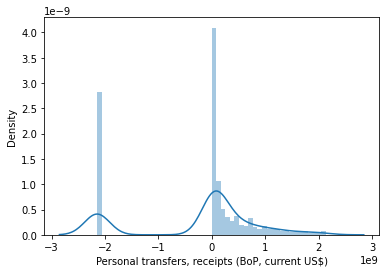

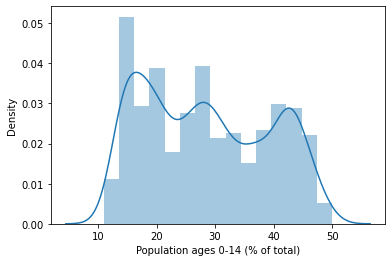

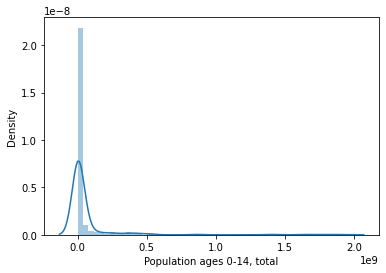

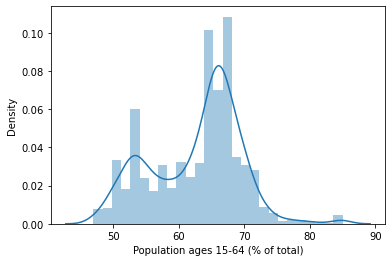

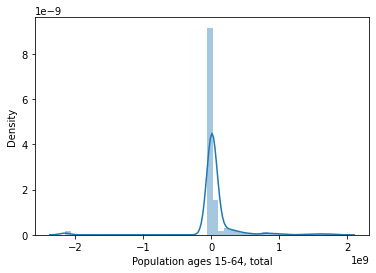

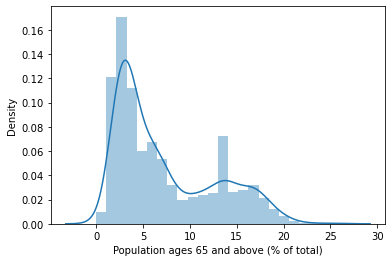

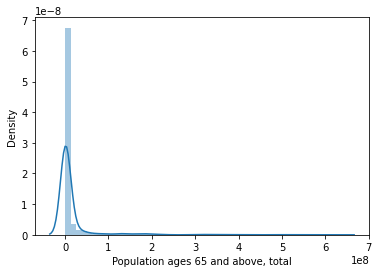

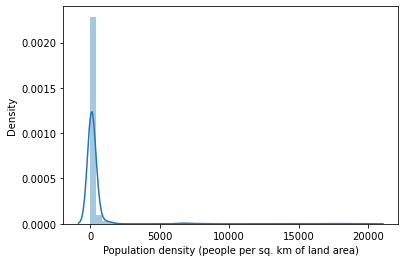

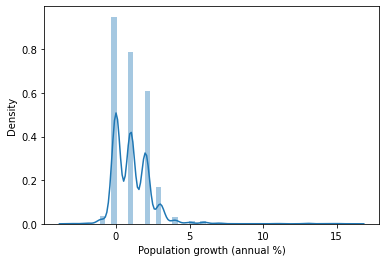

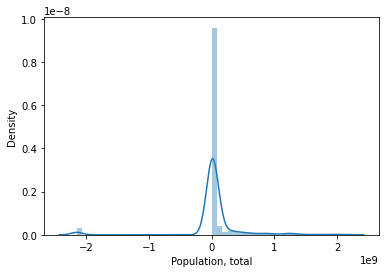

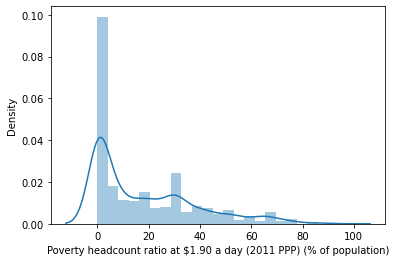

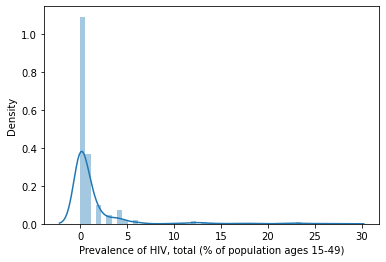

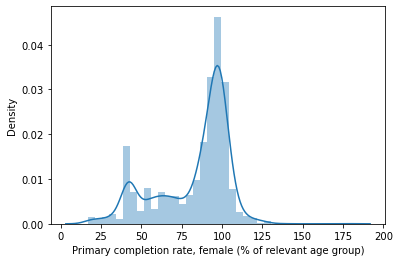

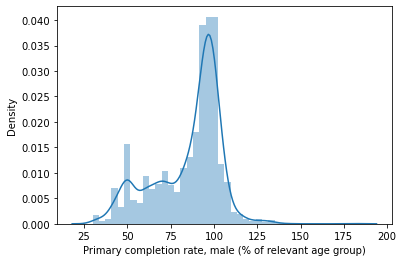

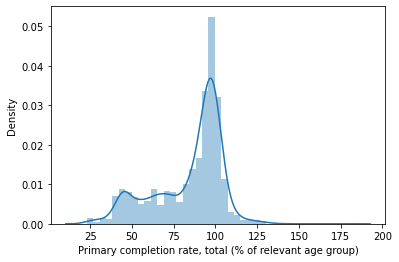

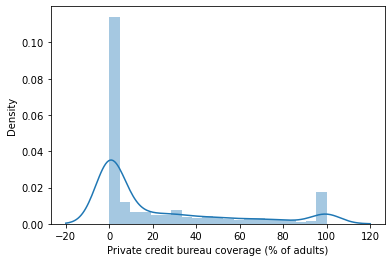

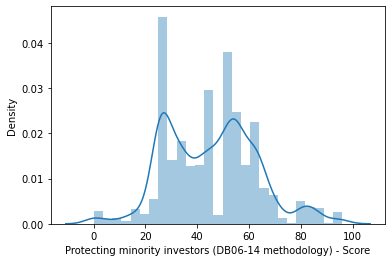

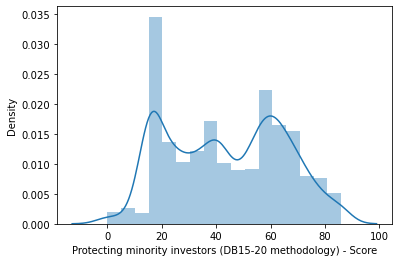

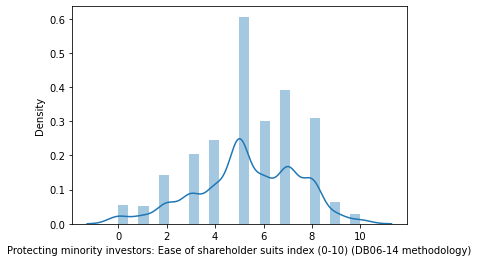

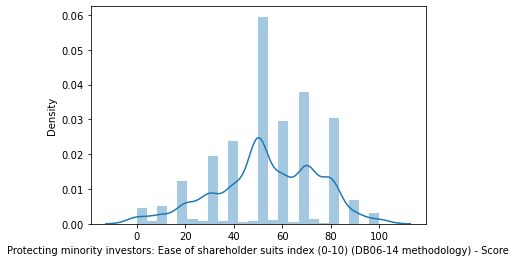

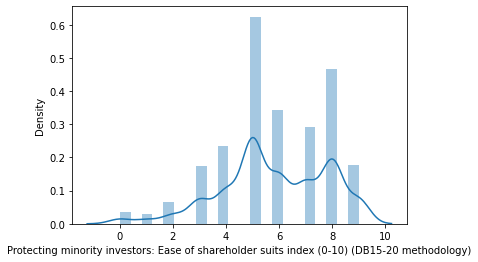

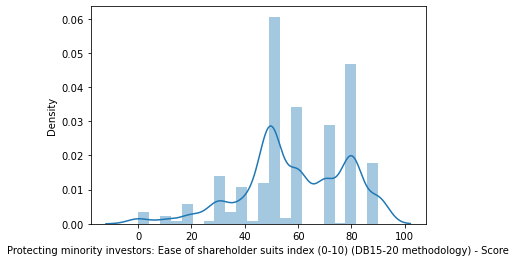

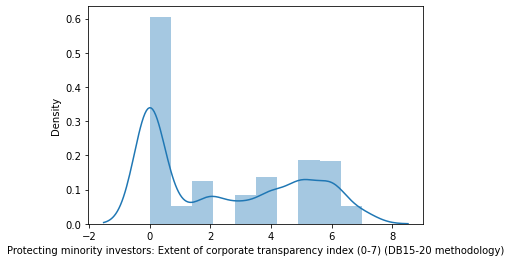

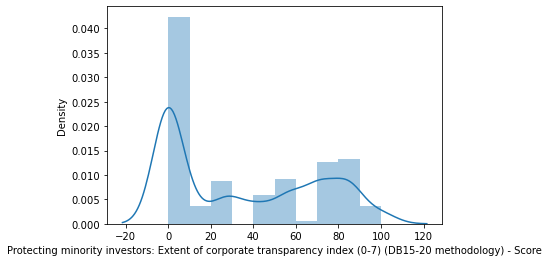

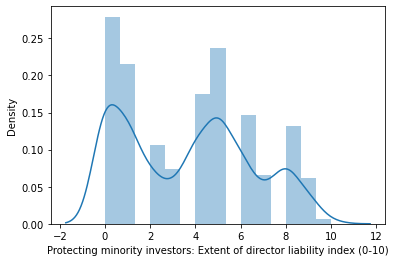

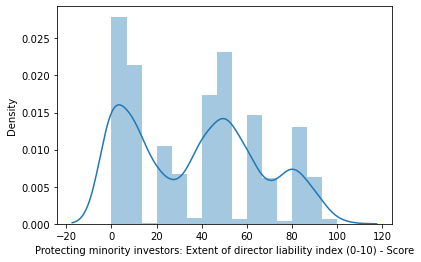

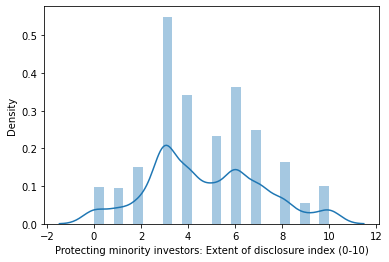

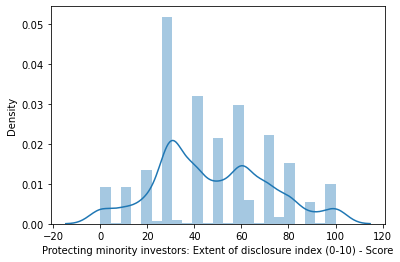

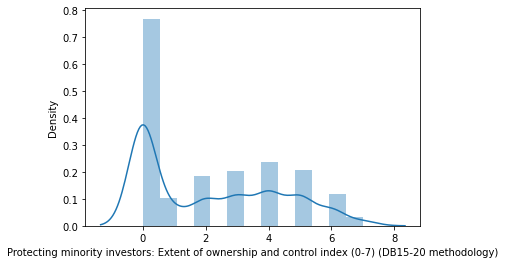

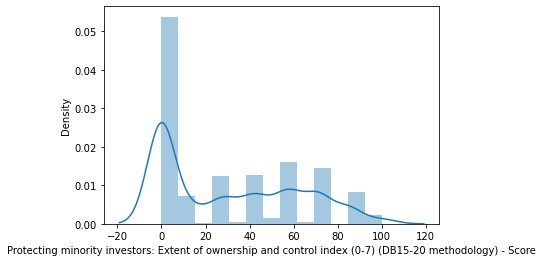

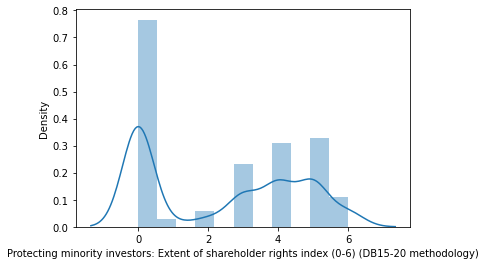

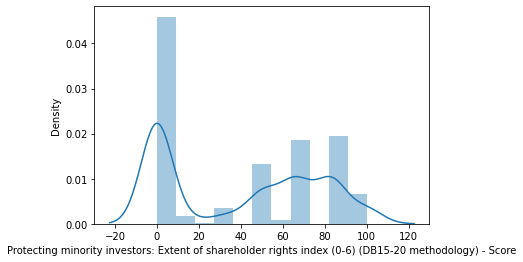

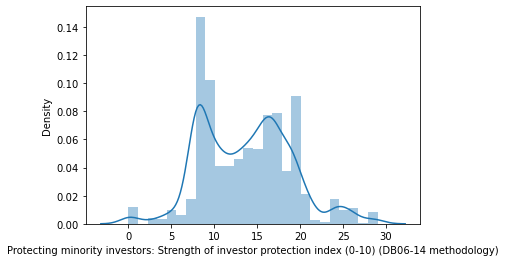

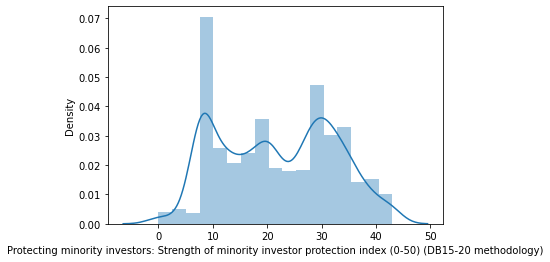

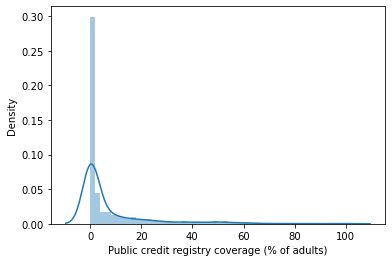

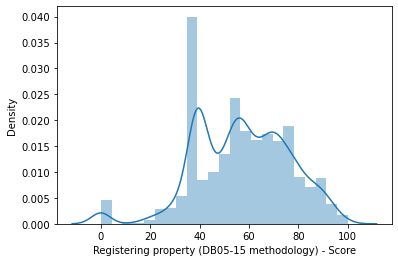

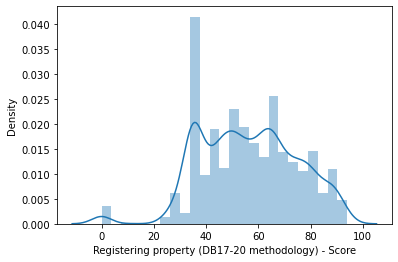

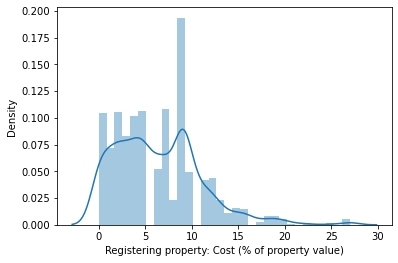

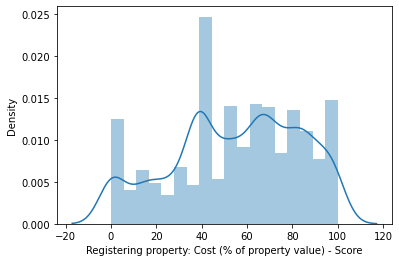

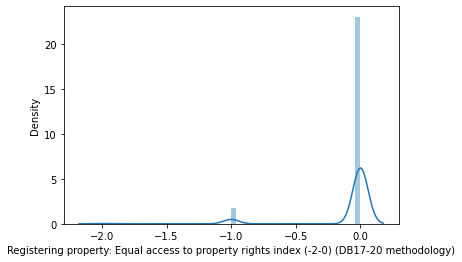

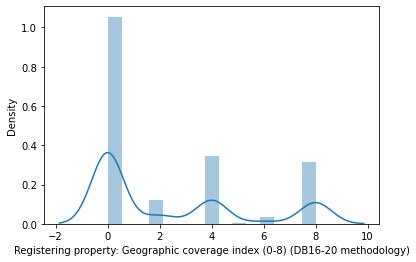

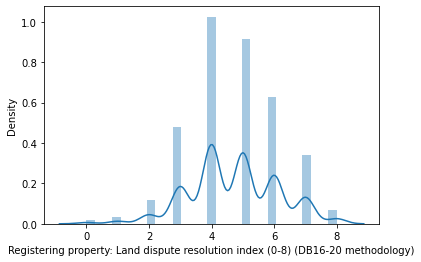

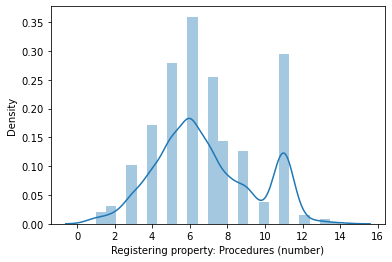

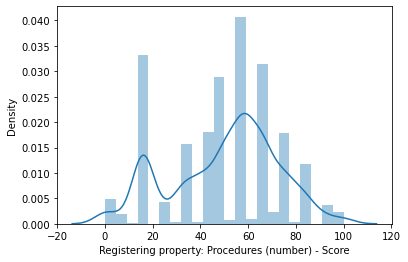

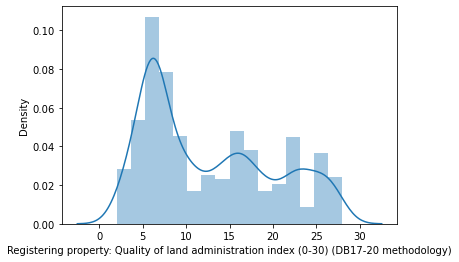

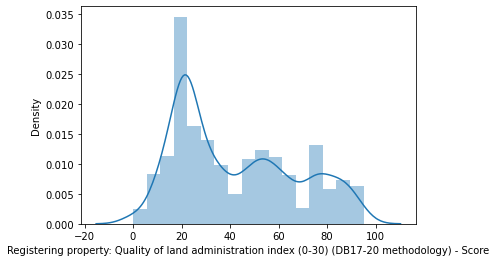

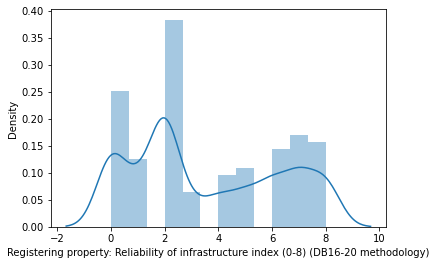

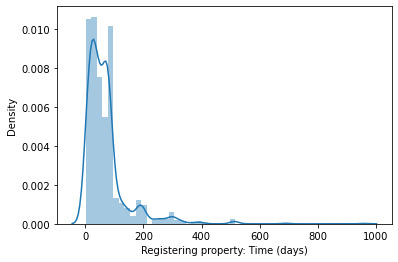

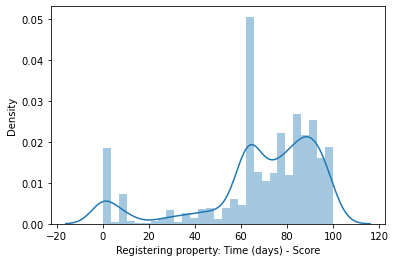

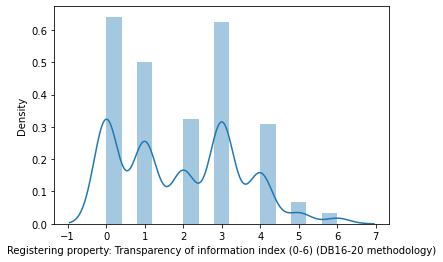

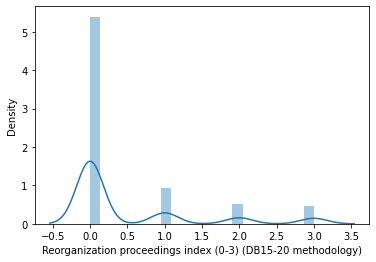

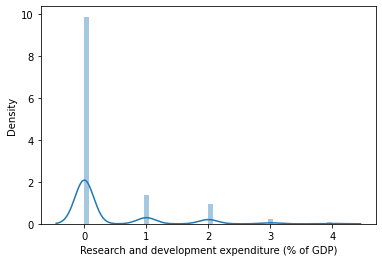

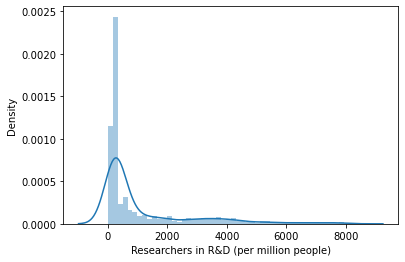

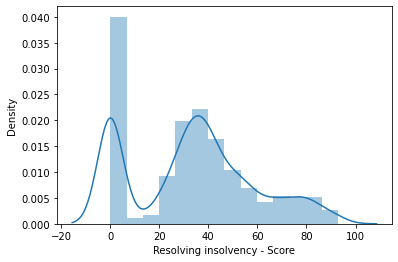

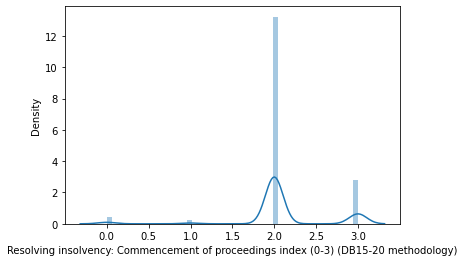

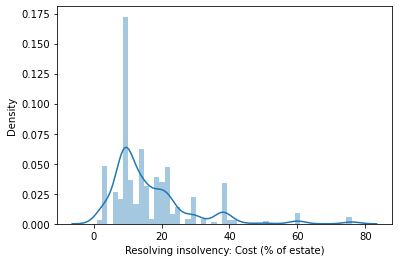

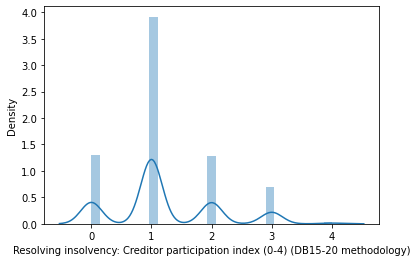

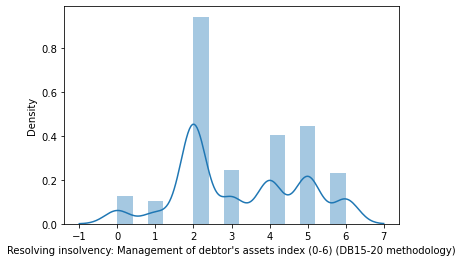

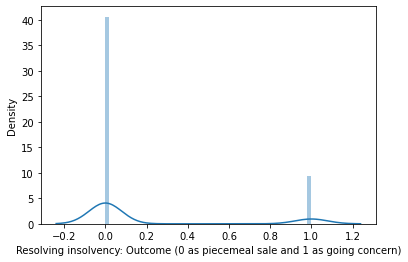

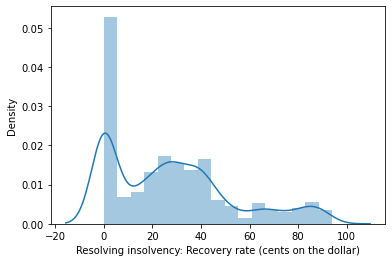

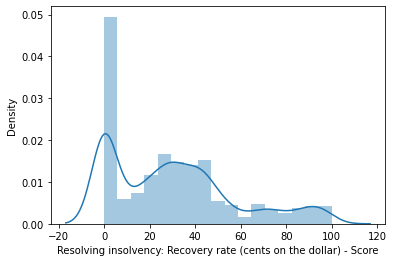

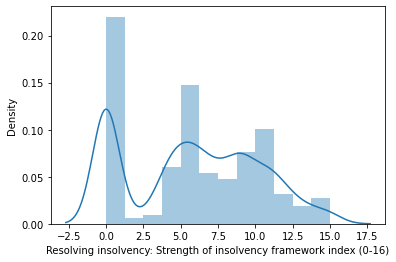

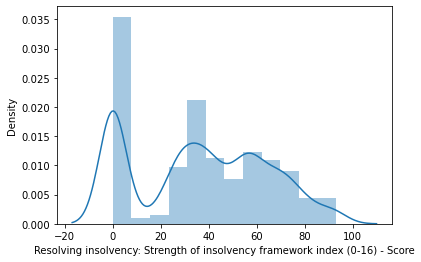

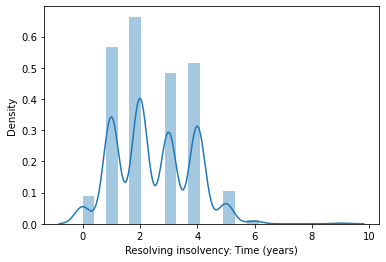

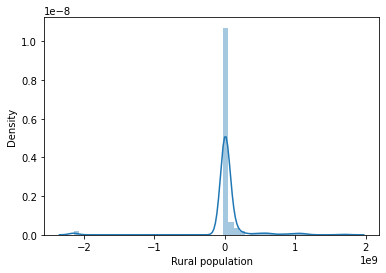

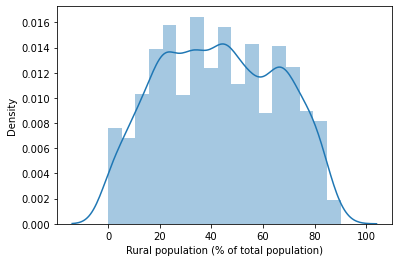

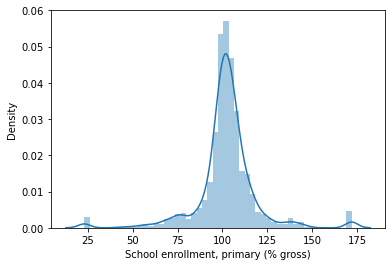

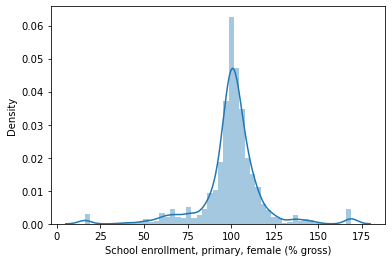

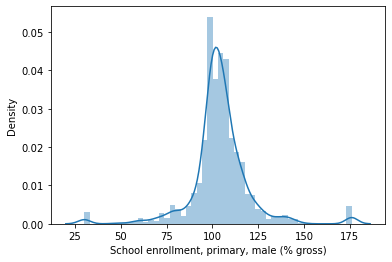

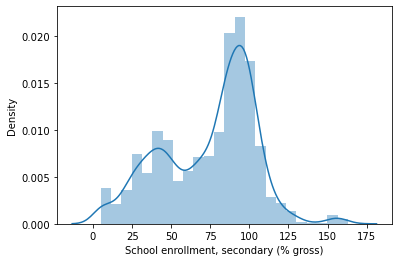

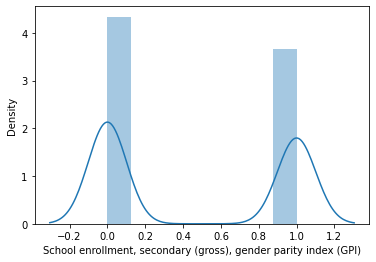

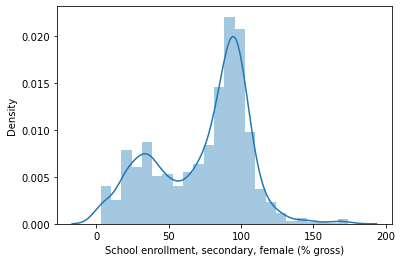

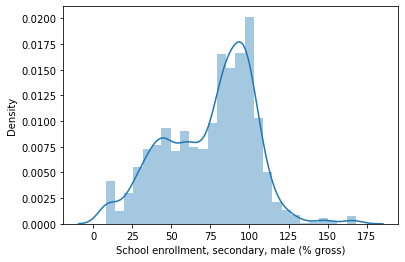

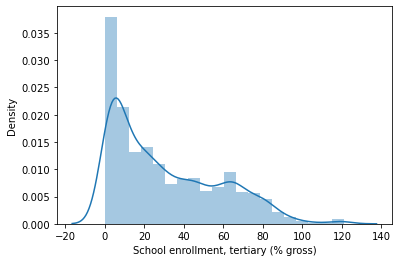

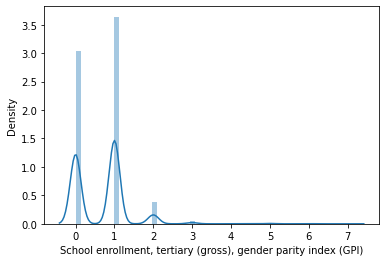

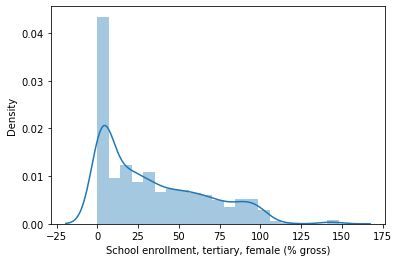

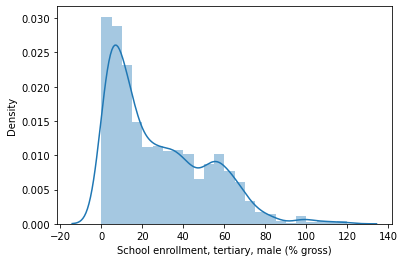

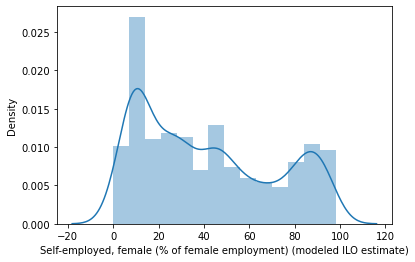

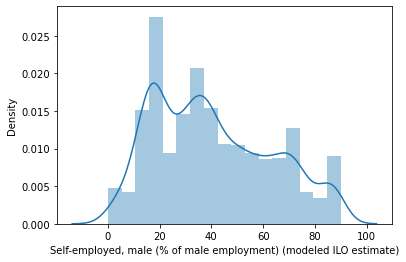

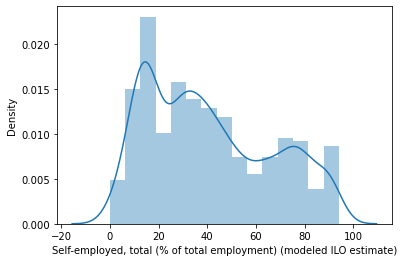

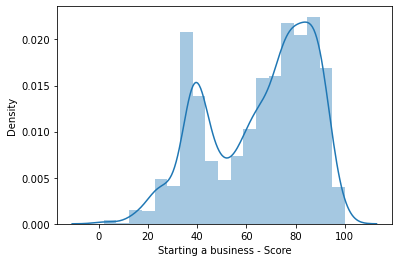

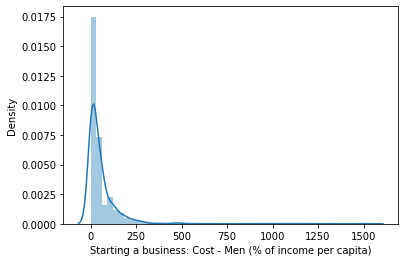

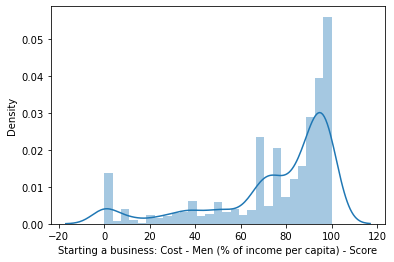

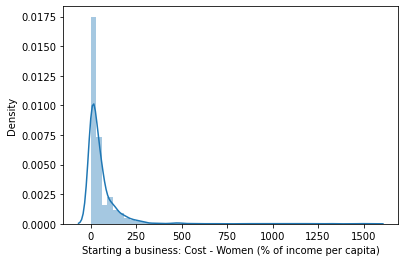

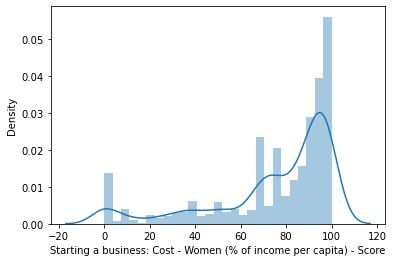

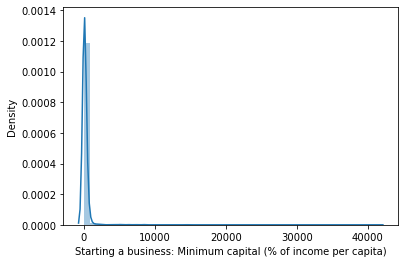

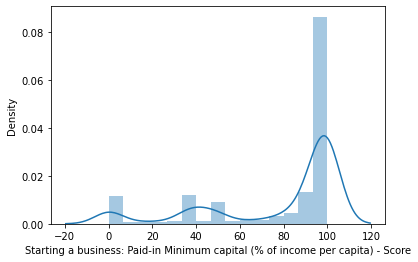

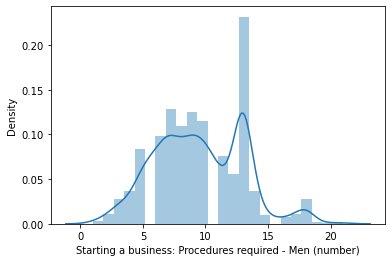

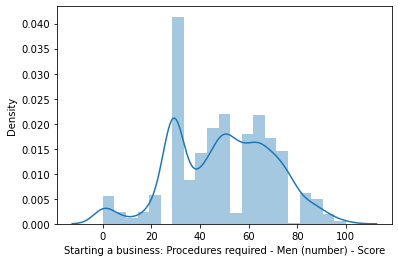

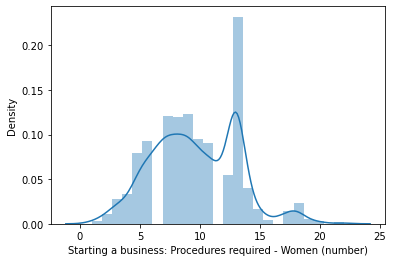

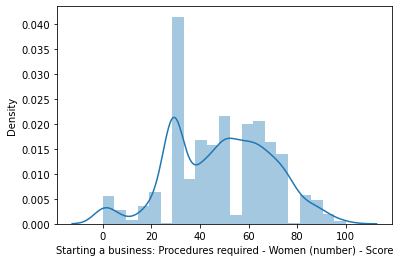

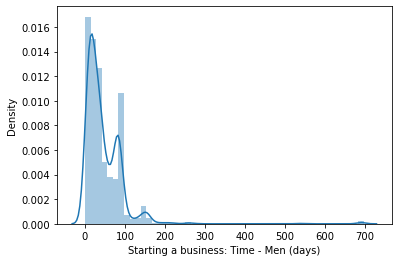

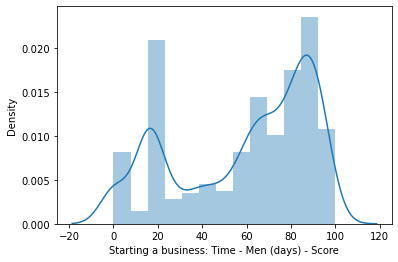

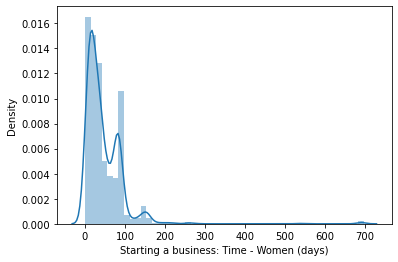

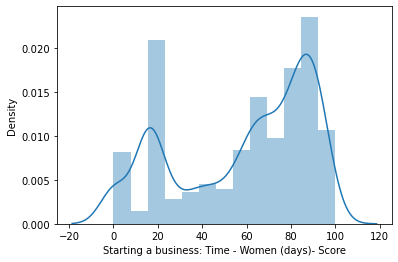

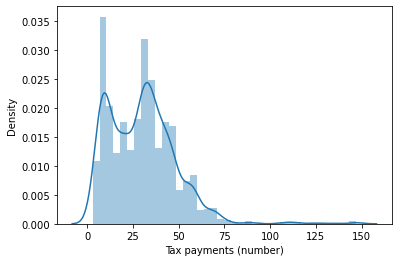

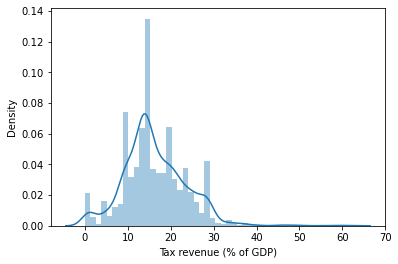

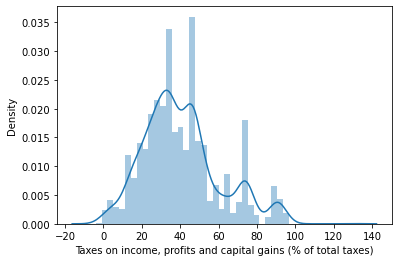

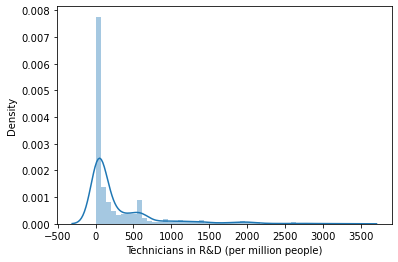

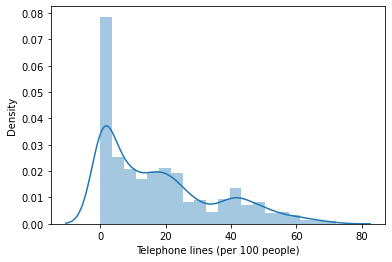

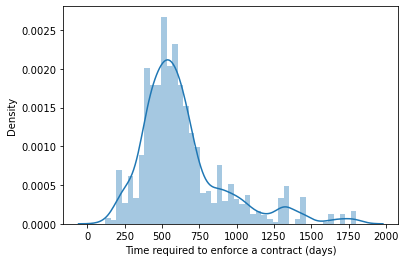

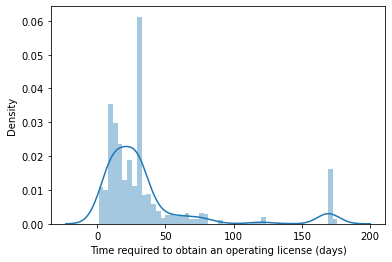

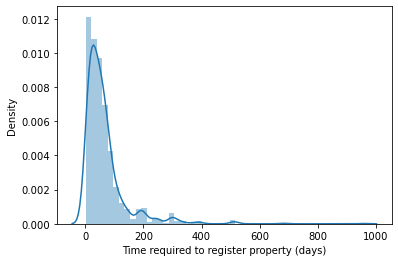

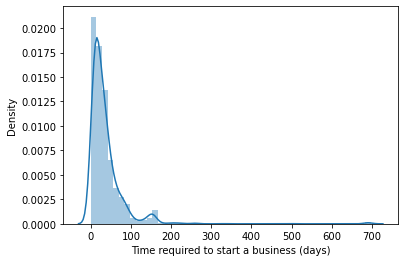

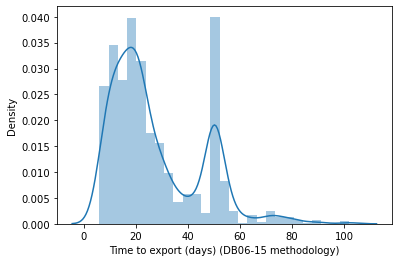

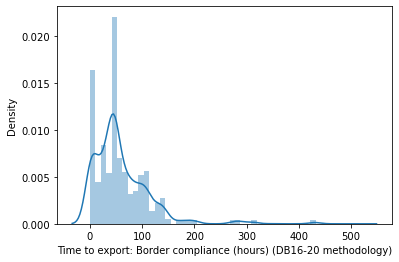

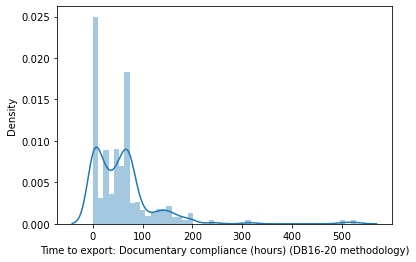

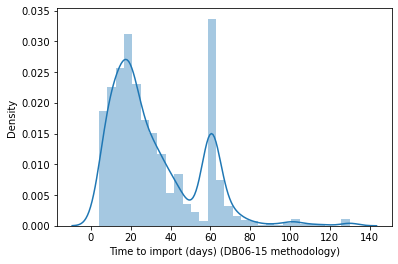

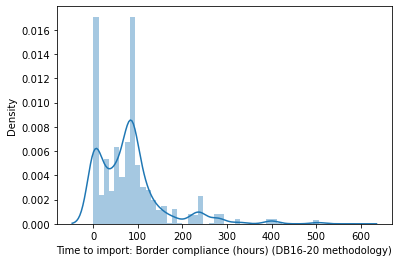

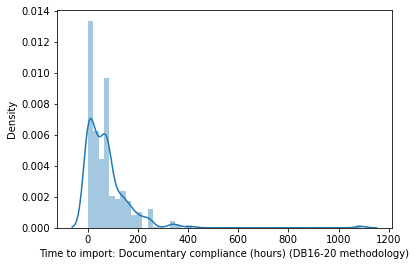

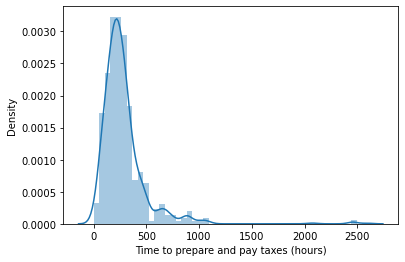

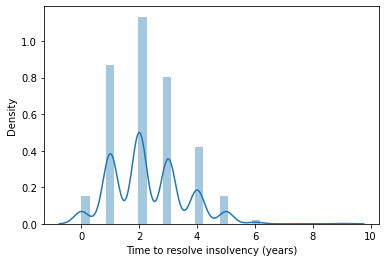

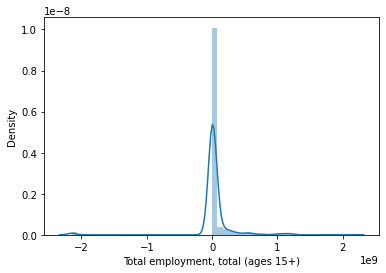

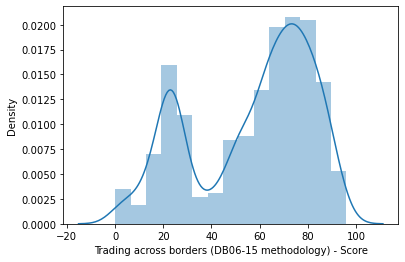

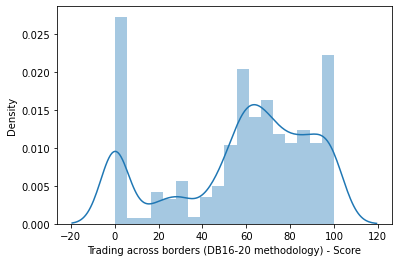

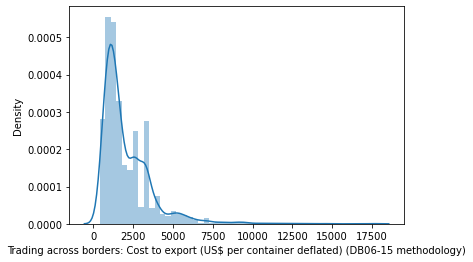

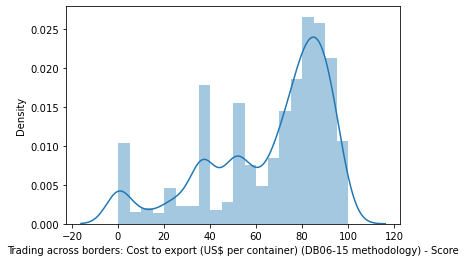

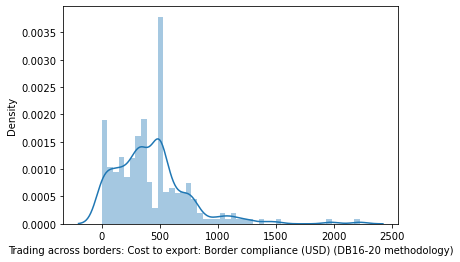

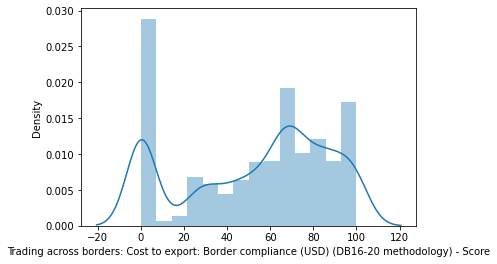

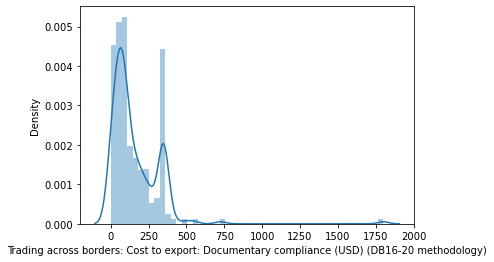

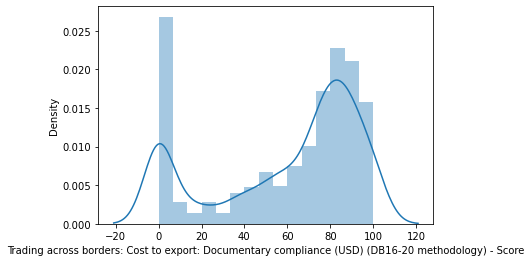

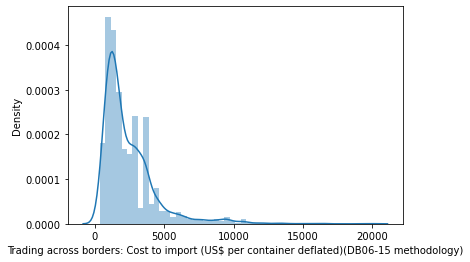

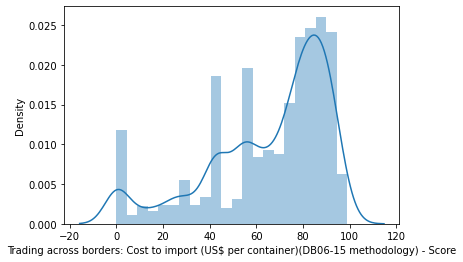

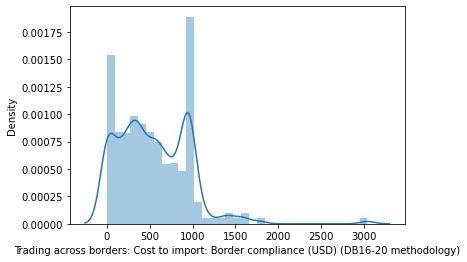

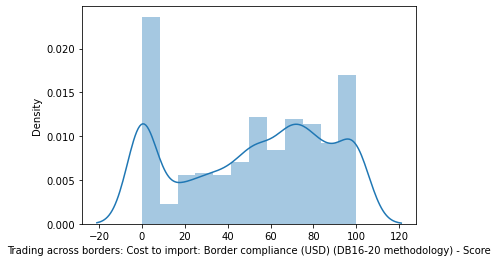

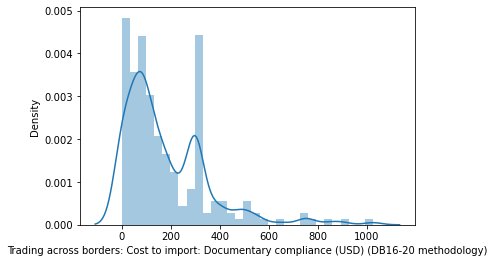

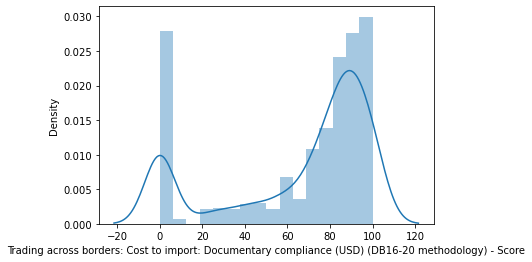

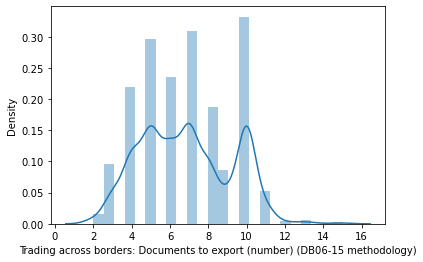

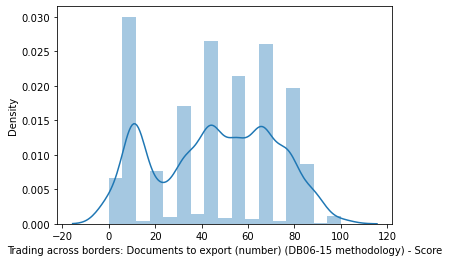

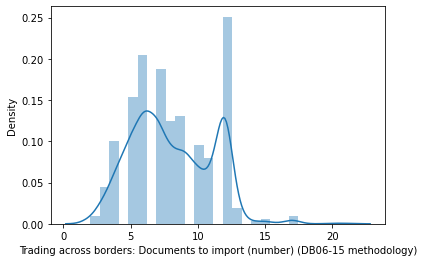

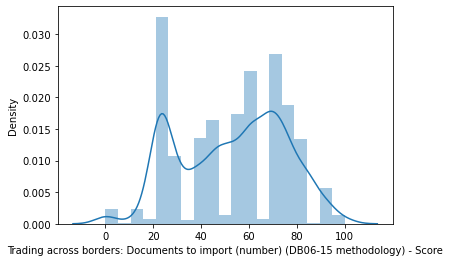

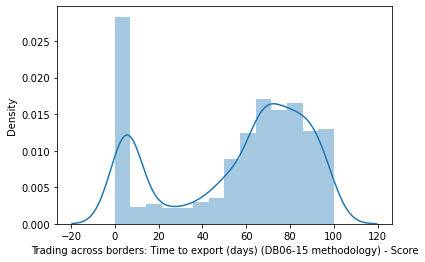

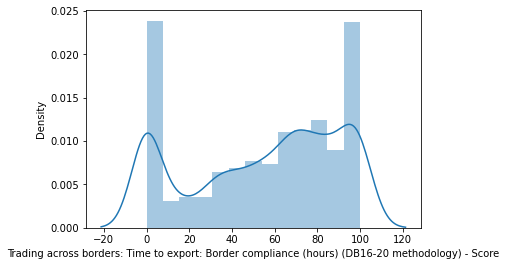

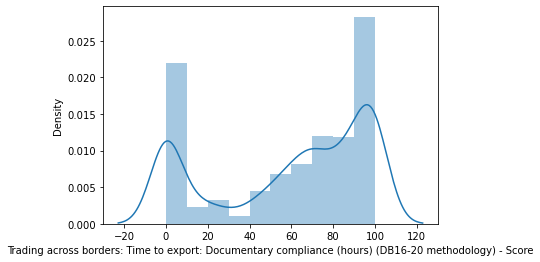

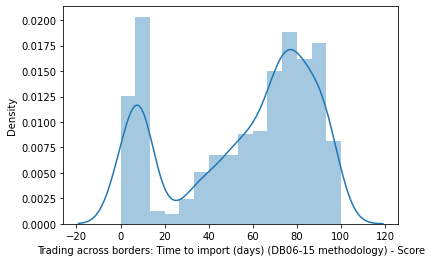

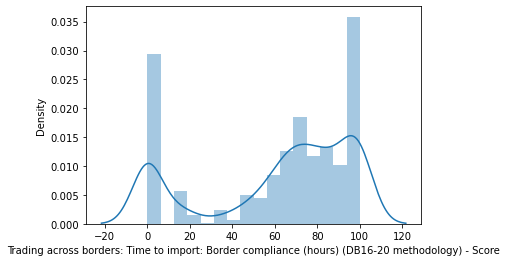

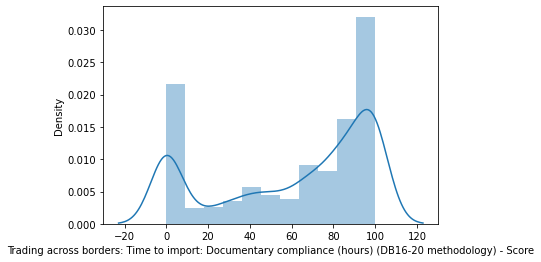

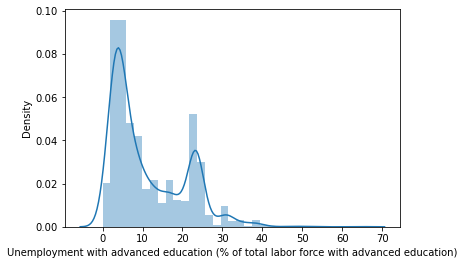

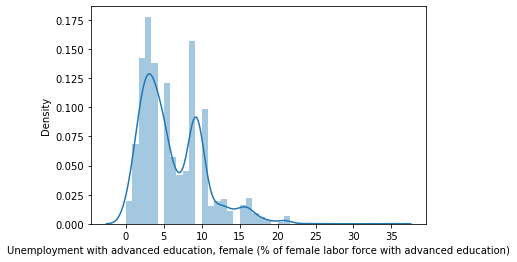

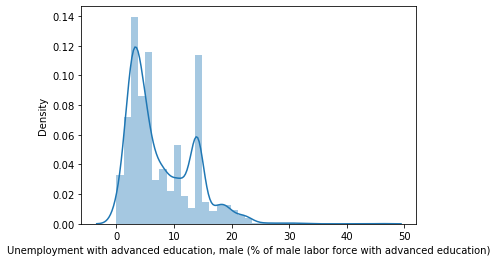

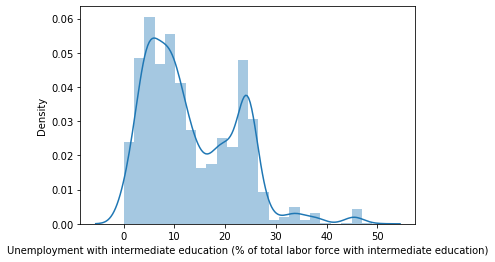

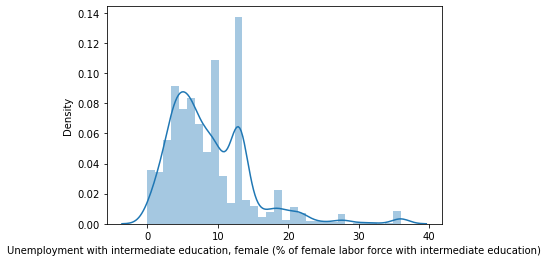

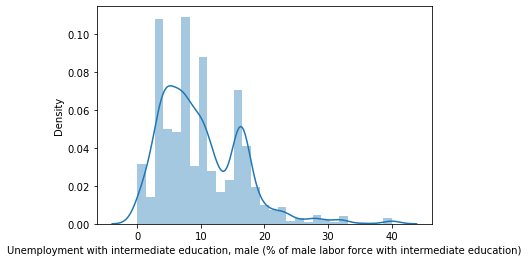

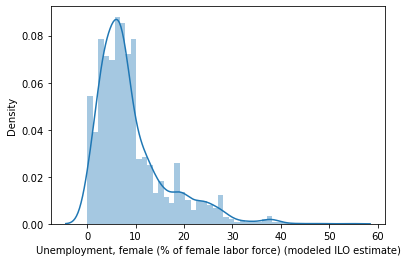

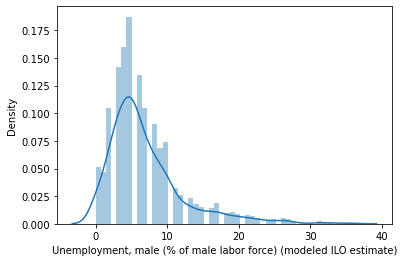

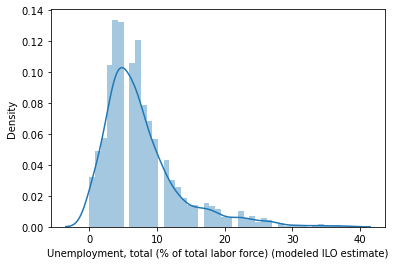

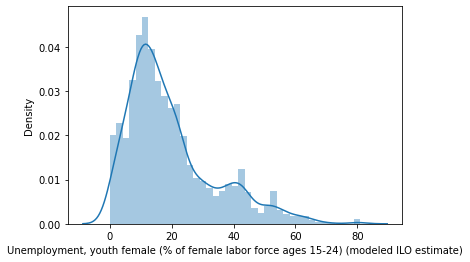

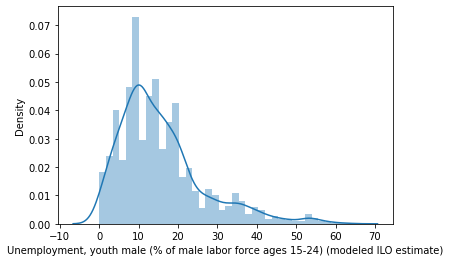

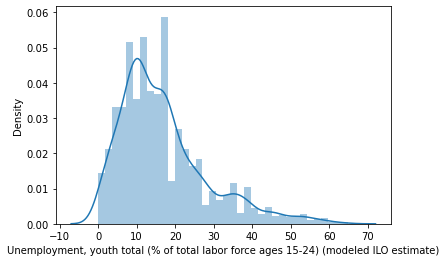

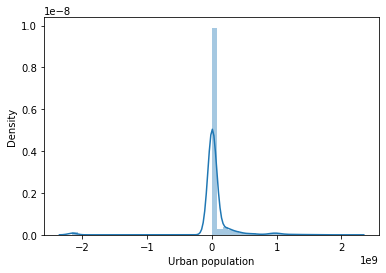

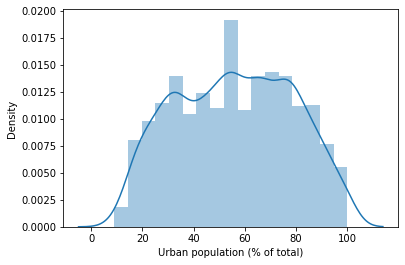

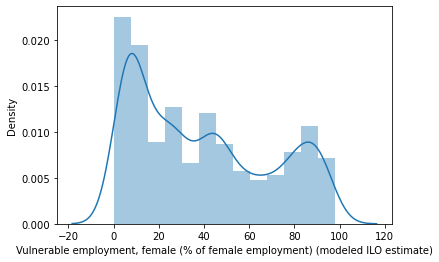

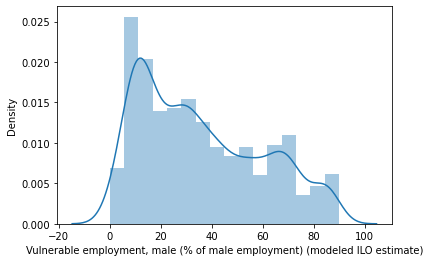

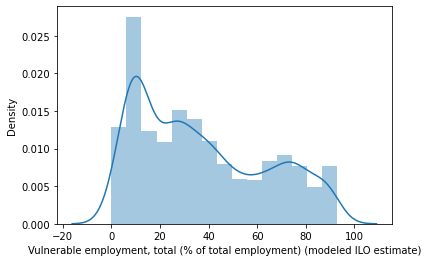

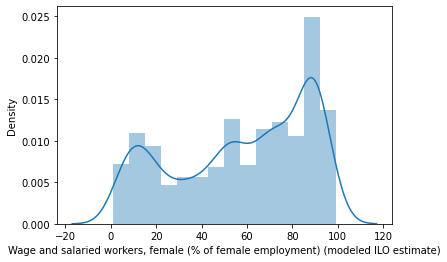

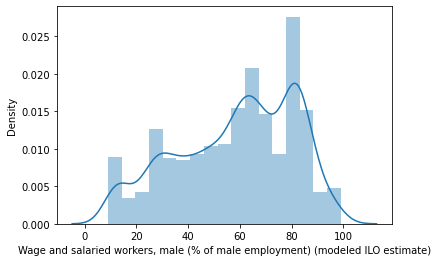

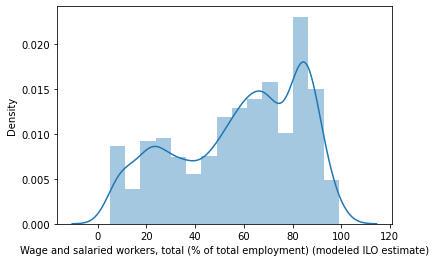

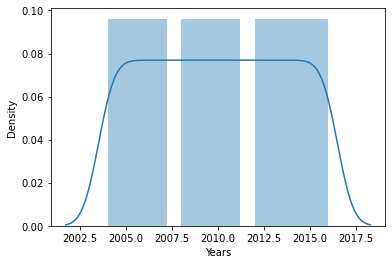

In [13]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

## Heatmap to check correlation, (output : 'GDP per capita')

Access to electricity (% of population)  \
0                                       17   
1                                       23   
2                                       28   
3                                       33   
4                                       42   

   Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0                                                134               
1                                                129               
2                                                123               
3                                                117               
4                                                111               

   Age dependency ratio (% of working-age population)  \
0                                                100    
1                                                 99    
2                                                 99    
3                                                100    
4                                                100    

   Agriculture, value added (% of GDP)  \
0                                   29   
1                                   30   
2                                   28   
3                                   29   
4                                   24   

   Agriculture, value added (annual % growth)  \
0                                         -22   
1                                          17   
2                                          -5   
3                                          14   
4                                         -14   

   Agriculture, value added (constant 2005 US$)  \
0                                   -2147483648   
1                                   -2147483648   
2                                   -2147483648   
3                                   -2147483648   
4                                   -2147483648   

   Air transport, registered carrier departures worldwide  \
0                                              22627        
1                                              22627        
2                                              22627        
3                                              22627        
4                                              22627        

   Automated teller machines (ATMs) (per 100,000 adults)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Borrowers from commercial banks (per 1,000 adults)  \
0                                                  3    
1                                                  3    
2                                                  3    
3                                                  3    
4                                                  3    

   Consumer price index (2010 = 100)  \
0                                 63   
1                                 71   
2                                 76   
3                                 82   
4                                108   

   Contributing family workers, female (% of female employment) (modeled ILO estimate)  \
0                                                 67                                     
1                                                 66                                     
2                                                 65                                     
3                                                 64                                     
4                                                 64                                     

   Contributing family workers, male (% of male employment) (modeled ILO estimate)  \
0                                                 25                                 
1                                                 26                                 
2       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

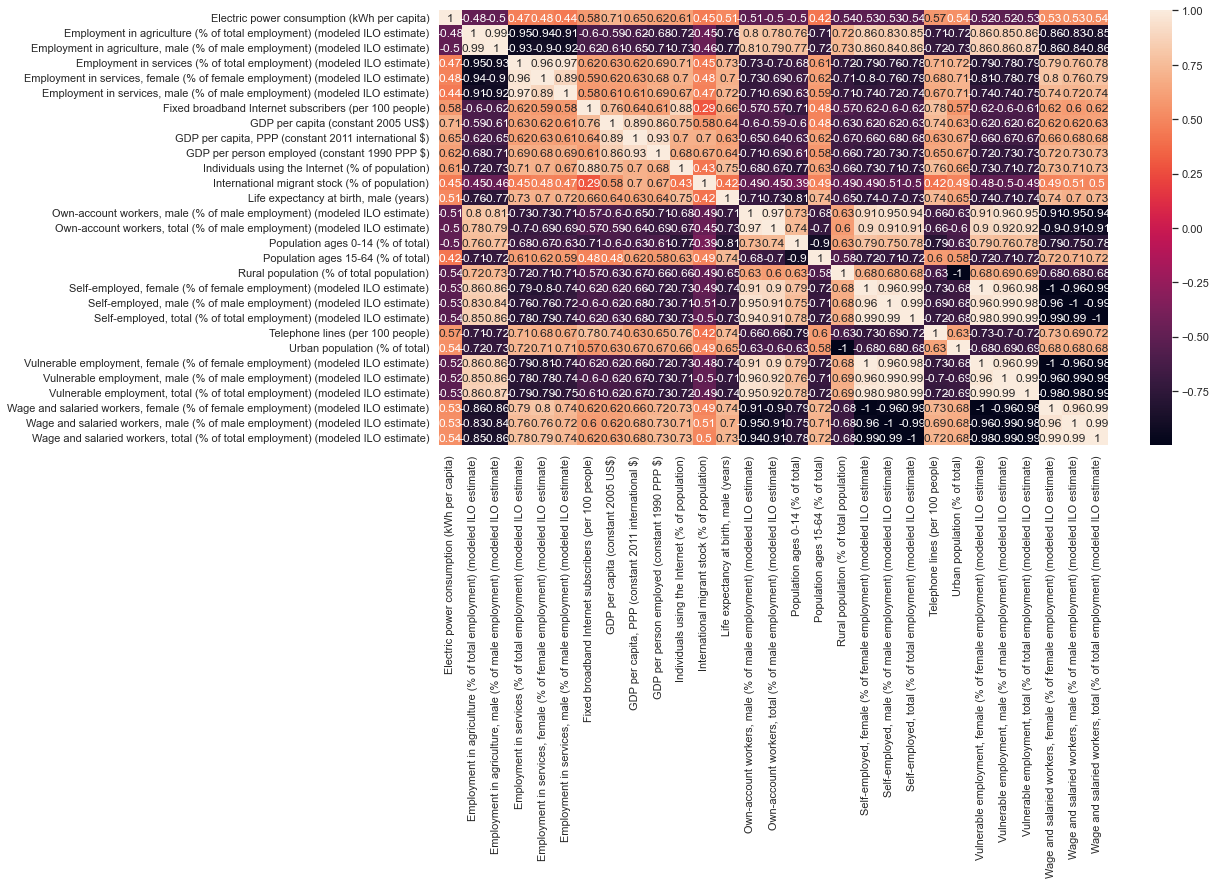

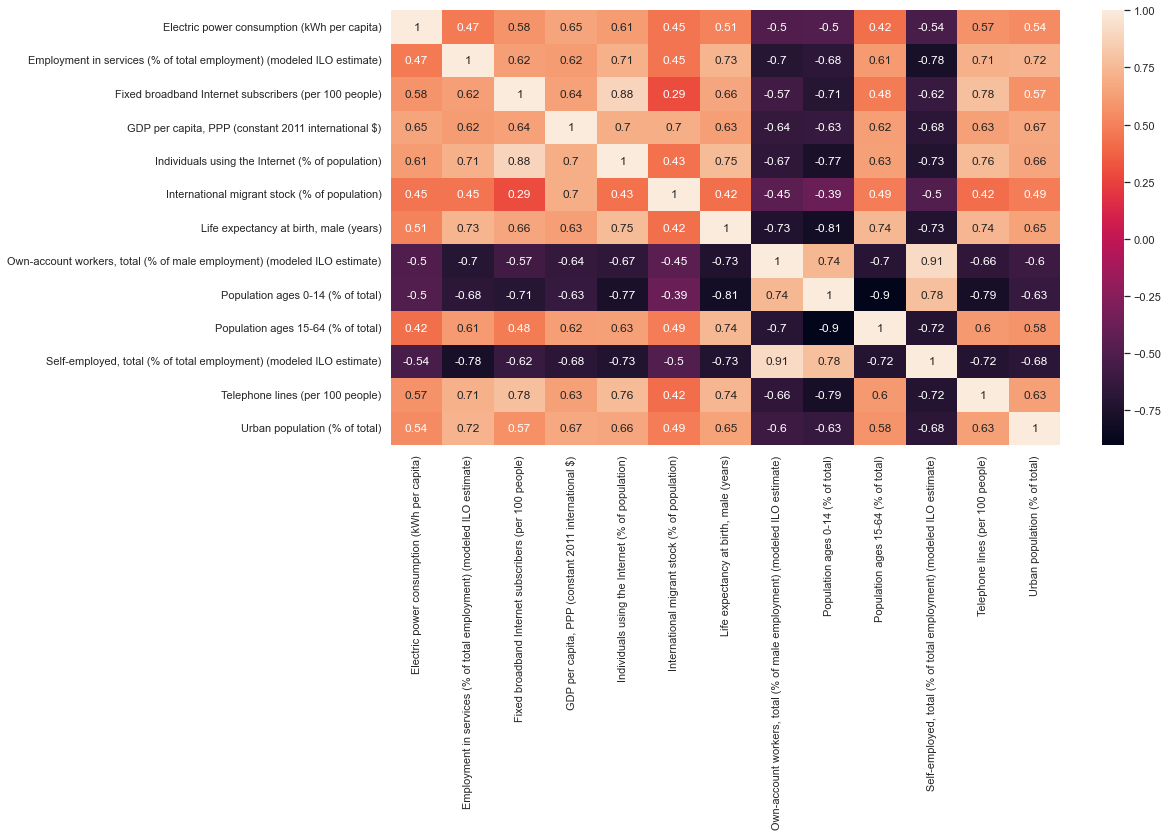

(2847, 13)

In [14]:
num = economy.select_dtypes("number")
display(num.head())

cf = 0.6

columns = []
corr_matrix = num.corr()

for col in num.columns:
        if (abs(corr_matrix.loc[col, "GDP per capita, PPP (constant 2011 international $)"]) >= cf):
            columns.append(col)
numerical_trimmed = pd.DataFrame(num, columns=columns)
pd.set_option('display.max_columns', None)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

numerical_trimmed = numerical_trimmed.drop(['Vulnerable employment, total (% of total employment) (modeled ILO estimate)','Wage and salaried workers, total (% of total employment) (modeled ILO estimate)','Employment in agriculture (% of total employment) (modeled ILO estimate)',"Rural population (% of total population)", "Employment in services, male (% of male employment) (modeled ILO estimate)", "Own-account workers, male (% of male employment) (modeled ILO estimate)", "Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)", 'GDP per capita (constant 2005 US$)',"GDP per person employed (constant 1990 PPP $)", "Self-employed, female (% of female employment) (modeled ILO estimate)", "Self-employed, male (% of male employment) (modeled ILO estimate)", "Vulnerable employment, male (% of male employment) (modeled ILO estimate)" ,"Vulnerable employment, female (% of female employment) (modeled ILO estimate)" ,"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)", "Wage and salaried workers, male (% of male employment) (modeled ILO estimate)"], axis = 1)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()


numerical_trimmed.shape

## We keep 14 columns out of 341
#### 1 Output to predict : "GDP per capita, PPP ($)
####  13 Features : those which has highest correlation to output and the lowest to each other to minimize the Noise & Overfitting

In [15]:
economy2 = numerical_trimmed
economy2.head()

Electric power consumption (kWh per capita)  \
0                                           62   
1                                           62   
2                                           62   
3                                           62   
4                                          301   

   Employment in services (% of total employment) (modeled ILO estimate)  \
0                                                 21                       
1                                                 21                       
2                                                 22                       
3                                                 23                       
4                                                 25                       

   Fixed broadband Internet subscribers (per 100 people)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   GDP per capita, PPP (constant 2011 international $)  \
0                                               1062     
1                                               1136     
2                                               1161     
3                                               1284     
4                                               1298     

   Individuals using the Internet (% of population)  \
0                                                 0   
1                                                 1   
2                                                 2   
3                                                 1   
4                                                 1   

   International migrant stock (% of population)  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Life expectancy at birth, male (years)  \
0                                      56   
1                                      57   
2                                      57   
3                                      58   
4                                      59   

   Own-account workers, total (% of male employment) (modeled ILO estimate)  \
0                                                 42                          
1                                                 42                          
2                                                 42                          
3                                                 42                          
4                                                 42                          

   Population ages 0-14 (% of total)  Population ages 15-64 (% of total)  \
0                                 47                                  49   
1                                 47                                  50   
2                                 47                                  50   
3                                 47                                  49   
4                                 47                                  49   

   Self-employed, total (% of total employment) (modeled ILO estimate)  \
0                                                 75                     
1                                                 74                     
2                                                 74                     
3                                                 72                     
4                                                 72                     

   Telephone lines (per 100 people)  Urban population (% of total)  
0                                 0                             22  
1                                 0                             22  
2                                 0 

### Extraction dataframe for data Viz on Tableau

In [16]:
economy["Country Name"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2842       Zimbabwe
2843       Zimbabwe
2844       Zimbabwe
2845       Zimbabwe
2846       Zimbabwe
Name: Country Name, Length: 2847, dtype: object

In [17]:
List = (economy["Country Name"], economy['Years'], economy["GDP per capita, PPP (constant 2011 international $)"], economy2)
economy3 = pd.concat(List, axis=1)
economy3.to_excel("Wealth_Synthesis_tableau.xlsx")


<IPython.core.display.Javascript object>

In [17]:
economy2['GDP per capita, PPP (constant 2011 international $)'].describe()

count      2847.000000
mean      17235.827538
std       19161.292117
min         577.000000
25%        3403.500000
50%       10995.000000
75%       25088.500000
max      135318.000000
Name: GDP per capita, PPP (constant 2011 international $), dtype: float64

## Train/test/split data

In [18]:
### X,y split

y = economy2['GDP per capita, PPP (constant 2011 international $)']
x = economy2.drop(["GDP per capita, PPP (constant 2011 international $)"], axis = 1)

In [19]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 80)
print(x_train.shape)
print(x_test.shape)

(2277, 12)
(570, 12)


## Scaling & transformation

In [20]:
### Normaliyation by columns 

transformer = MinMaxScaler().fit(x_train)
filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Notebooks/Scalers/Standard_Scaler.pkl"
# with open(filename, "wb") as file:
#     pickle.dump(scaler, file)
x_train_norm = transformer.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_train_norm

<IPython.core.display.Javascript object>

Electric power consumption (kWh per capita)  \
0                                        0.136029   
1                                        0.000639   
2                                        0.145395   
3                                        0.000639   
4                                        0.010023   
...                                           ...   
2272                                     0.023423   
2273                                     0.001406   
2274                                     0.161022   
2275                                     0.113081   
2276                                     0.013583   

      Employment in services (% of total employment) (modeled ILO estimate)  \
0                                              0.524390                       
1                                              0.207317                       
2                                              0.792683                       
3                                              0.829268                       
4                                              0.134146                       
...                                                 ...                       
2272                                           0.609756                       
2273                                           0.000000                       
2274                                           0.939024                       
2275                                           0.756098                       
2276                                           0.682927                       

      Fixed broadband Internet subscribers (per 100 people)  \
0                                              0.068182       
1                                              0.045455       
2                                              0.636364       
3                                              0.022727       
4                                              0.000000       
...                                                 ...       
2272                                           0.113636       
2273                                           0.000000       
2274                                           0.613636       
2275                                           0.386364       
2276                                           0.000000       

      Individuals using the Internet (% of population)  \
0                                             0.224490   
1                                             0.214286   
2                                             0.897959   
3                                             0.173469   
4                                             0.030612   
...                                                ...   
2272                                          0.408163   
2273                                          0.000000   
2274                                          0.806122   
2275                                          0.622449   
2276                                          0.000000   

      International migrant stock (% of population)  \
0                                          0.511364   
1                                          0.022727   
2                                          0.011364   
3                                          0.125000   
4                                          0.022727   
...                                             ...   
2272                                       0.000000   
2273                                       0.000000   
2274                                       0.477273   
2275                                       0.170455   
2276                                       0.000000   

      Life expectancy at birth, male (years)  \
0                                   0.871795   
1                                   0.692308   
2                                   0.974359   
3                                   0.743590   
4                                   0.153846   
...              

In [21]:
transformer = MinMaxScaler().fit(x_test)
x_test_norm = transformer.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)
x_test_norm

<IPython.core.display.Javascript object>

Electric power consumption (kWh per capita)  \
0                                       0.000693   
1                                       0.130698   
2                                       0.003215   
3                                       0.986370   
4                                       0.000693   
..                                           ...   
565                                     0.185142   
566                                     0.140536   
567                                     0.266576   
568                                     0.074484   
569                                     0.007316   

     Employment in services (% of total employment) (modeled ILO estimate)  \
0                                             0.123457                       
1                                             0.938272                       
2                                             0.395062                       
3                                             0.864198                       
4                                             0.530864                       
..                                                 ...                       
565                                           0.802469                       
566                                           0.851852                       
567                                           0.901235                       
568                                           0.740741                       
569                                           0.419753                       

     Fixed broadband Internet subscribers (per 100 people)  \
0                                             0.000000       
1                                             0.642857       
2                                             0.023810       
3                                             0.785714       
4                                             0.238095       
..                                                 ...       
565                                           0.476190       
566                                           0.571429       
567                                           0.761905       
568                                           0.619048       
569                                           0.000000       

     Individuals using the Internet (% of population)  \
0                                            0.062500   
1                                            0.822917   
2                                            0.010417   
3                                            0.968750   
4                                            0.729167   
..                                                ...   
565                                          0.718750   
566                                          0.635417   
567                                          0.979167   
568                                          0.750000   
569                                          0.020833   

     International migrant stock (% of population)  \
0                                         0.024096   
1                                         0.313253   
2                                         0.000000   
3                                         0.120482   
4                                         0.361446   
..                                             ...   
565                                       0.253012   
566                                       0.277108   
567                                       0.168675   
568                                       0.048193   
569                                       0.000000   

     Life expectancy at birth, male (years)  \
0                                     0.500   
1                                     0.975   
2                                     0.650   
3                                     0.950   
4                                     0.800   
..                                      ...   
565                                

## Apply the linear model & results

In [22]:

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
MAPE_train = mean_absolute_percentage_error(y_pred_train, y_train)
MAPE_test = mean_absolute_percentage_error(y_pred_test, y_test)

print("R2 score of train dataset is", round(r2_train,3))
print("R2 score of test dataset is", round(r2_test,3))
print()
print("MAPE of train dataset is", round(MAPE_train, 2))
print("MAPE of test dataset is", round(MAPE_test, 2))


R2 score of train dataset is 0.699
R2 score of test dataset is 0.693

MAPE of train dataset is 2.91
MAPE of test dataset is 2.6


## Apply DecisionTreeRegressor & Results

In [23]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=10,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             random_state = 42)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

Train data R2 was: 0.98
Test data R2 was: 0.96


## Apply KNeighborsRegressor & Results

In [24]:
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=3)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

Train data R2 was: 0.94
Test data R2 was: 0.83


# Hyperparameter search

## Apply RandomForestRegressor + GridSearchCV & Result

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth_choices= [8,10,12]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [5,6,7] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

### More detailed search : optimization parameters

In [ ]:
max_depth_choices= [9,10,11]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [9,10,11] 
min_samples_leaf_choices = [4,5,6] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

## Apply RandomForestRegressor model & Results

In [27]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=10,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n What characteristics have an impact on wealth per individual?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance

The R2 for the Random Forest in the TRAIN set is 0.98
The R2 for the Random Forest in the TEST  set is 0.94


 What characteristics have an impact on wealth per individual?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('International migrant stock (% of population)', 46085.0),
 ('Electric power consumption (kWh per capita)', 36926.0),
 ('Population ages 15-64 (% of total)', 33877.0),
 ('Fixed broadband Internet subscribers (per 100 people)', 33858.0),
 ('Population ages 0-14 (% of total)', 18432.0),
 ('Urban population (% of total)', 11058.0),
 ('Own-account workers, total (% of male employment) (modeled ILO estimate)',
  -9975.0),
 ('Individuals using the Internet (% of population)', -5005.0),
 ('Telephone lines (per 100 people)', -2055.0),
 ('Employment in services (% of total employment) (modeled ILO estimate)',
  -1833.0),
 ('Life expectancy at birth, male (years)', -1665.0),
 ('Self-employed, total (% of total employment) (modeled ILO estimate)',
  -562.0)]

In [29]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n What characteristics have an impact on wealth per individual?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 0.95


 What characteristics have an impact on wealth per individual?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('International migrant stock (% of population)', 46085.0),
 ('Electric power consumption (kWh per capita)', 36926.0),
 ('Population ages 15-64 (% of total)', 33877.0),
 ('Fixed broadband Internet subscribers (per 100 people)', 33858.0),
 ('Population ages 0-14 (% of total)', 18432.0),
 ('Urban population (% of total)', 11058.0),
 ('Own-account workers, total (% of male employment) (modeled ILO estimate)',
  -9975.0),
 ('Individuals using the Internet (% of population)', -5005.0),
 ('Telephone lines (per 100 people)', -2055.0),
 ('Employment in services (% of total employment) (modeled ILO estimate)',
  -1833.0),
 ('Life expectancy at birth, male (years)', -1665.0),
 ('Self-employed, total (% of total employment) (modeled ILO estimate)',
  -562.0)]

## Apply RandomForestRegressor + cross_val_score & Result

In [28]:
from sklearn.model_selection import cross_val_score

y_true = y_train
clf = RandomForestRegressor(max_depth=10,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cross_val_scores_train = cross_val_score(clf, x_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(clf, x_test, y_test, cv=5)


print("The mean R2 Train of the folds was {:.2f}".format(np.mean(cross_val_scores_train)))
print("The mean R2 Test of the folds was {:.2f}".format(np.mean(cross_val_scores_test)))

<IPython.core.display.Javascript object>

The mean R2 Train of the folds was 0.97


<IPython.core.display.Javascript object>

The mean R2 Test of the folds was 0.87


## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= [8,10,12]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [5,6,7] 
# Create the  grid 
random_grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 10) 
random_search.fit(x_train, y_train)
random_search.best_params_